# [1] Data Set Information

This Dataset has been taken from kaggle.com The source of the data set is given as follows:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

### File Description

### Data fields: Attribute Information

<p>Data Field description.</p>
<ul>
<li>id - listing ID</li>
<li>name - name of the listing</li>
<li>host_id - host ID</li>
<li>host_name - name of the host</li>
<li>neighbourhood_group - location</li>
<li>neighbourhood - area</li>
<li>latitude - latitude coordinates</li>
<li>longitude - longitude coordinates</li>
<li>room_type - listing space type</li>
<li>price - price in dollars</li>
<li>minimum_nights - amount of nights minimum</li>
<li>number_of_reviews - number of reviews</li>
<li>last_review - latest review</li>
<li>reviews_per_month - number of reviews per month</li>
<li>calculated_host_listings_count - amount of listing per host</li>
<li>availability_365 - number of days when listing is available for booking</li>
</ul>

# [2] Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, LinearSVR

import warnings
warnings.filterwarnings('ignore')

# [3] Reading the datasets

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

# [4] Initial Overview of the datasets

In [3]:
df.shape

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### As you can see the variability amongst the columns is different. Minimum Nights has 1250 as maximum while reviwes_per_month is only 58. So Definitely a scaling approach is needed.

In [7]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

# [5] Data Pre-processing - Exploration, Cleaning

In [8]:
df.describe(include='O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [9]:
df.select_dtypes('float').head()

,latitude,longitude,reviews_per_month
0,40.64749,-73.97237,0.21
1,40.75362,-73.98377,0.38
2,40.80902,-73.94190,NaN
3,40.68514,-73.95976,4.64
4,40.79851,-73.94399,0.10


In [10]:
df.select_dtypes('object').head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [11]:
df.corr().iloc[:,4].round(2).sort_values(ascending = False)

price                             1.00
availability_365                  0.08
calculated_host_listings_count    0.06
minimum_nights                    0.04
latitude                          0.03
host_id                           0.02
id                                0.01
reviews_per_month                -0.03
number_of_reviews                -0.05
longitude                        -0.15
Name: price, dtype: float64

In [12]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [13]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [14]:
df.name.value_counts()

Hillside Hotel                                                                         18
Home away from home                                                                    17
New york Multi-unit building                                                           16
Brooklyn Apartment                                                                     12
Private Room                                                                           11
                                                                                       ..
Charming and cozy 1BR apartment / Heart of NYC                                          1
Prospect Heights / Brooklyn Botanical Garden $ Prospect Park West\n#kuetheresidence     1
CLASSIC GUEST ROOM - UWS Townhouse                                                      1
Roomy and Comftable Room                                                                1
King Size Dream Room                                                                    1
Name: name

In [15]:
df.host_name.value_counts()

Michael           417
David             403
Sonder (NYC)      327
John              294
Alex              279
                 ... 
Caryn               1
Ishai               1
Rigoberto           1
Mel And Laurie      1
Nati                1
Name: host_name, Length: 11452, dtype: int64

In [16]:
type(df['last_review'][1])

str

# [6] Handling Missing Values And Imputating Them

In [17]:
df['last_review'].isna().sum()

10052

In [18]:
df['last_review'].fillna('1990-01-01',inplace=True)

In [19]:
type(df['last_review'][1])

str

In [20]:
df['last_review']=pd.to_datetime(df['last_review'])

In [21]:
print('Oldest Date In this DateSet is', df[df['last_review']!='1990-01-01'] ['last_review'].min())
print('Latest Date In this DateSet is', df['last_review'].max())

Oldest Date In this DateSet is 2011-03-28 00:00:00
Latest Date In this DateSet is 2019-07-08 00:00:00


In [22]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1990-01-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Here the 'last_review' column is of object data type but according to the data present in it, the data type should be datetime.

In [23]:
df['last_review_year'] = df.last_review.map(lambda x:x.year)

In [24]:
def Nulls(df):
    nulls = pd.DataFrame({'Total Null Values':df.isnull().sum(),'Null %':round(df.isnull().sum()/len(df.index)*100,2)})
    return nulls[nulls['Null %']!=0].sort_values(by='Null %',ascending=False)

In [25]:
Nulls(df)

,Total Null Values,Null %
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03


### Since HostName and name null values are very less we can drop the rows and it wouldnt make much impact on the dataset. But for Reviews_Per_Month we need a different approach which has been perfomed below

In [26]:
df.dropna(subset=['host_name','name'],inplace=True)

In [27]:
temp=df.groupby(['name','host_name'])['reviews_per_month'].mean().reset_index()
temp[temp.host_name=='Valentin']

,name,host_name,reviews_per_month
13,"! ! ! Coliving: live, work, create",Valentin,NaN
15,!!! Beautiful private room with backyard.,Valentin,0.04
16,!!! Outpost Coliving . Shared twin room,Valentin,0.09
17,!!!Co-Housing taken to the Next Level /Flatbush/2,Valentin,0.09
18,!!!Living&Working. Beautiful Coliving on Flatbush,Valentin,0.13
19,!!!Outpost Coliving . Flatbush. Cozy shared room,Valentin,NaN
3969,Amazing Williamsburg entire Loft. Floor 2B,Valentin,1.26
5062,BIG 1 BDR Apartment -close to Times Square,Valentin,4.00
6869,Beautiful shared room in Modern CoLiving space,Valentin,0.18
7478,Best CoLiving next to Bushwick!,Valentin,0.22


In [28]:
df["reviews_per_month"] = df.groupby(['name','host_name']).transform(lambda x: x.fillna(x.mean()))

In [29]:
Nulls(df)

,Total Null Values,Null %


# [7] Data Transformation And Visualization

### Since these below variables are object type we need to convert them into integers for the model to understand and since they dont have ordinality in them we use Dummies to convert them.

In [30]:
df=pd.concat([df,pd.get_dummies(df['room_type'],prefix='RoomTyp')],axis=1)
df=pd.concat([df,pd.get_dummies(df['neighbourhood'],prefix='Neighbourhood')],axis=1)
df=pd.concat([df,pd.get_dummies(df['neighbourhood_group'],prefix='Neighbourhood_group')],axis=1)

In [31]:
'''
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('nyu_2451_34490.shp'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
'''

"\nfrom shapely.geometry import Point\nimport geopandas as gpd\nfrom geopandas import GeoDataFrame\n\ngeometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]\ngdf = GeoDataFrame(df, geometry=geometry)   \n\n#this is a simple map that goes with geopandas\nworld = gpd.read_file(gpd.datasets.get_path('nyu_2451_34490.shp'))\ngdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)\n"

In [32]:
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1089.0,87.469238,106.798933,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.410523,186.936694,0.0,60.0,90.0,150.0,10000.0
Manhattan,21643.0,196.897473,291.489822,0.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.536017,167.128794,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


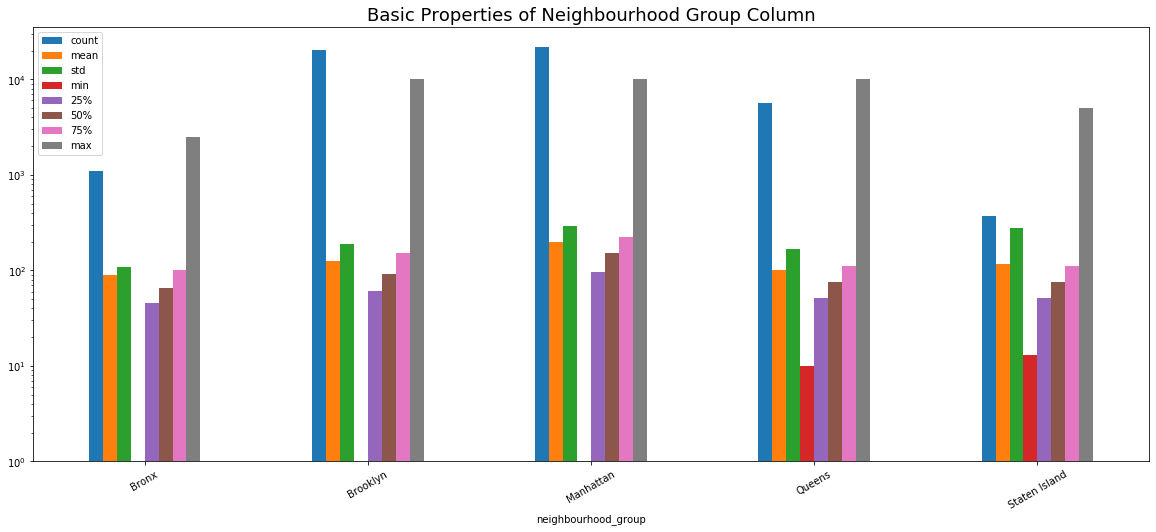

In [33]:
df.groupby('neighbourhood_group')['price'].describe().plot(kind='bar', log=True, figsize=(20,8))
plt.xticks(rotation = 30)
plt.title('Basic Properties of Neighbourhood Group Column',fontsize=18)
plt.show()

The average price of rooms/accomodation is maximum in Manhattan.Though the maximum price in all the neighborhood_group is almost the same. The Interesting thing to take here is Queens And Staten Island doesnt shell down the mimimum price. This shows that theu had standard rooms which has a high inital cost.

At the Same Time The standard Deviatin in Staten Island & Manhattan is high which means the price vary more here

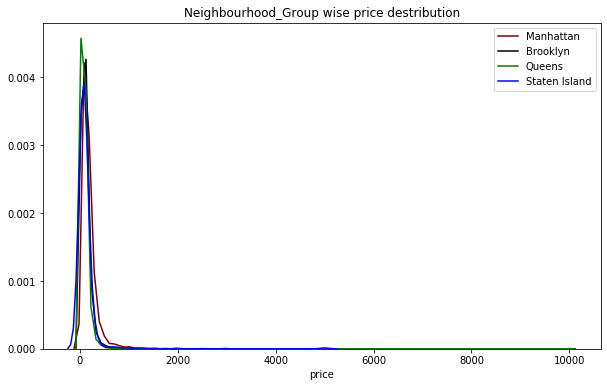

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Neighbourhood_Group wise price destribution')

plt.show()

In [35]:
df.sort_values(by='price',ascending=False)[['neighbourhood','neighbourhood_group','price','availability_365','name','host_name']].head(30)

,neighbourhood,neighbourhood_group,price,availability_365,name,host_name
17692,Greenpoint,Brooklyn,10000,0,Luxury 1 bedroom apt. -stunning Manhattan views,Erin
29238,Upper West Side,Manhattan,10000,83,1-BR Lincoln Center,Jelena
9151,Astoria,Queens,10000,0,Furnished room in Astoria apartment,Kathrine
12342,Lower East Side,Manhattan,9999,83,"Quiet, Clean, Lit @ LES & Chinatown",Amy
40433,Lower East Side,Manhattan,9999,365,2br - The Heart of NYC: Manhattans Lower East ...,Matt
6530,East Harlem,Manhattan,9999,0,Spanish Harlem Apt,Olson
30268,Tribeca,Manhattan,8500,251,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Rum
4377,Clinton Hill,Brooklyn,8000,365,Film Location,Jessica
29662,Upper East Side,Manhattan,7703,146,East 72nd Townhouse by (Hidden by Airbnb),Sally
42523,Battery Park City,Manhattan,7500,364,70' Luxury MotorYacht on the Hudson,Jack


Some of the highest priced Listing are from Manhattam predominantly.

In [36]:
#sns.catplot(x = 'neighbourhood_group', y = 'price',kind = 'box', data = df)
#It seems that there are very high values of price which can be categorised as outliers. We can use prices less than 2000.

Text(0.5, 1.0, 'Neighbour and Price of Top 15 Priced Listings Overall')

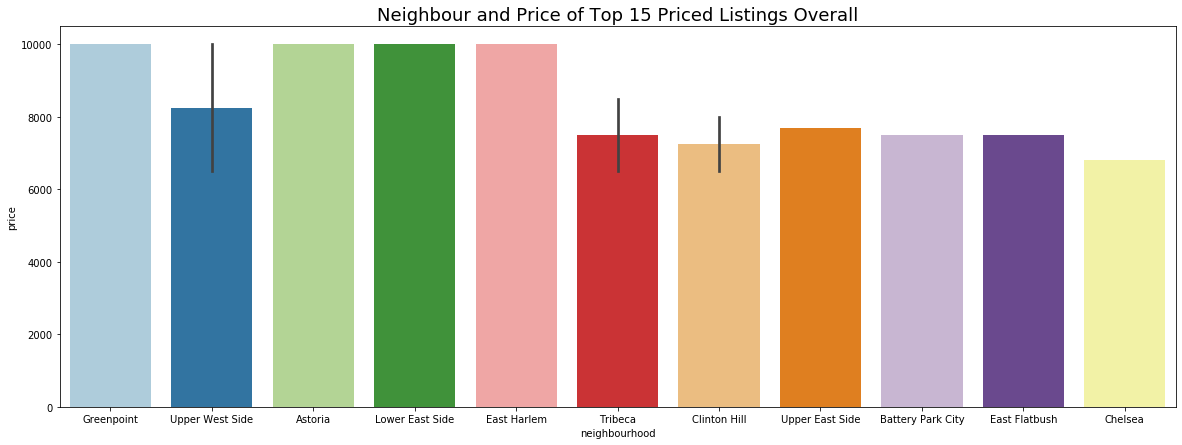

In [37]:
plt.figure(figsize=(20,7))
sns.barplot(x='neighbourhood', y='price', data=df.sort_values(by='price',ascending=False)[['neighbourhood','price']].head(15),palette='Paired')
plt.title('Neighbour and Price of Top 15 Priced Listings Overall',fontsize=18)

Neighbour:- Greenpoint, Astoria, Lower East Side, East harlem has the highest priced rooms. The second highest is Upper West Side.

Text(0.5, 1.0, 'Availability of Top 15 Priced Listings Overall')

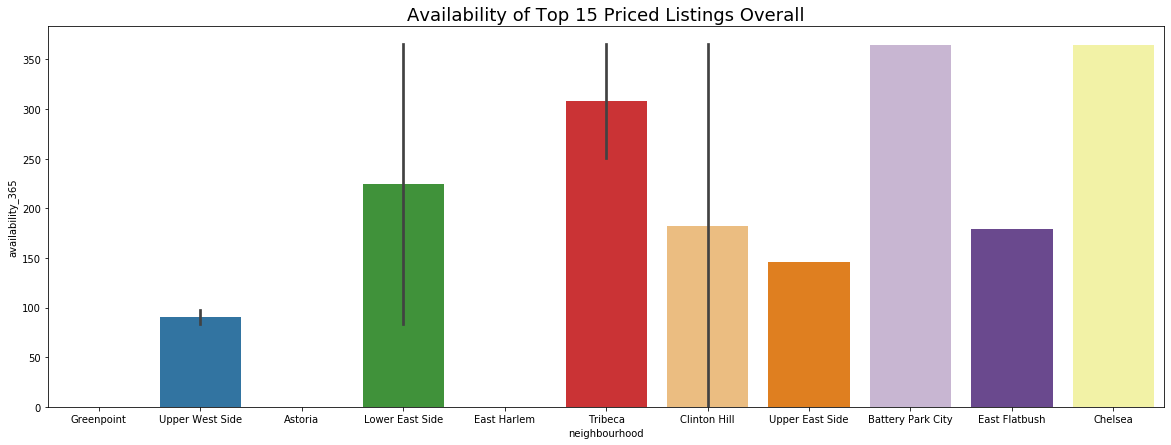

In [38]:
plt.figure(figsize=(20,7))
sns.barplot(x='neighbourhood', y='availability_365', data=df.sort_values(by='price',ascending=False)[['neighbourhood','price','availability_365']].head(15),palette='Paired')
plt.title('Availability of Top 15 Priced Listings Overall',fontsize=18)

It is bit noticeable fact that out of 4 highest priced rooms in neighbours only 1 is listing for booking. It seems like other 3 are not listed online. But still they have highest priced rooms. It is a possiblity that they are not available to book online.

In [39]:
m=df.groupby(['neighbourhood_group','neighbourhood']).mean()['price'].reset_index().sort_values(by=['neighbourhood_group','neighbourhood','price'])

m[(m.neighbourhood_group=='Queens') ].nlargest(5,'price')

,neighbourhood_group,neighbourhood,price
163,Queens,Neponsit,274.666667
134,Queens,Breezy Point,213.333333
154,Queens,Jamaica Estates,182.947368
127,Queens,Arverne,171.779221
132,Queens,Belle Harbor,171.500000


In [40]:
#df.groupby(['neighbourhood_group','neighbourhood'])['price'].agg({'price':'mean'}).sort_values('price').reset_index()

Text(0.5, 1.0, 'Average Price Per Neighbourhood_Group')

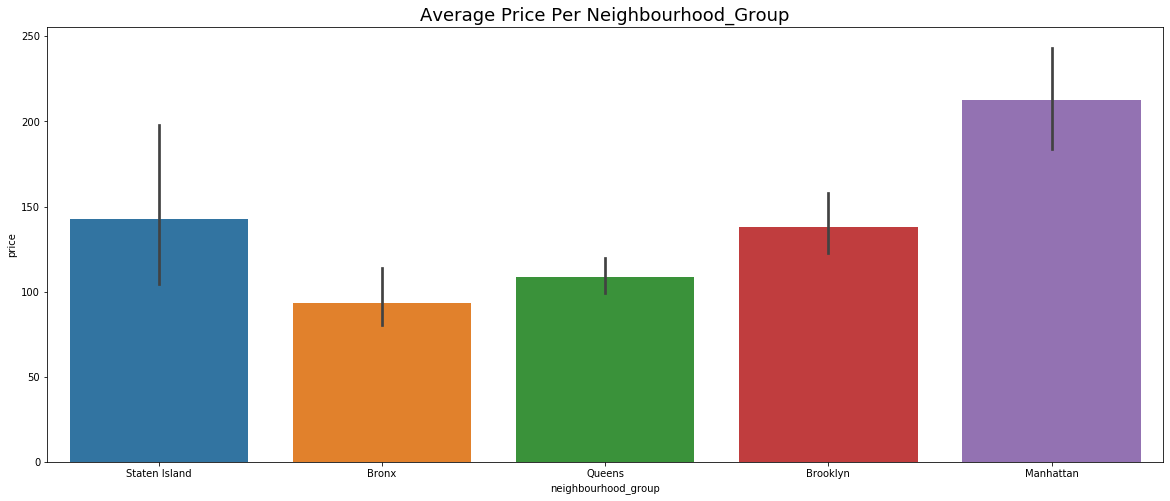

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x='neighbourhood_group',y='price', data=df.groupby(['neighbourhood_group','neighbourhood'])['price'].agg({'price':'mean'}).sort_values('price').reset_index())
plt.title('Average Price Per Neighbourhood_Group',fontsize=18)

The Surprising Thing Here That some rooms are so expensive but still the average of all these are so low compared to the highest price which means that not all the listings are at high range. 

The Manhattan has the highest mean price. Second highet is Brooklyn and Bronx has the lowest mean priced roooms/accomodation. Let's figure out which area of the Manhattan/Brooklyn has highest price.

In [42]:
df_pricebyneigh = df.groupby(['neighbourhood','neighbourhood_group'])['price'].agg({'price':'mean'}).sort_values('price',ascending=False).reset_index()
df_pricebyneigh.head(10)

,neighbourhood,neighbourhood_group,price
0,Fort Wadsworth,Staten Island,800.000000
1,Woodrow,Staten Island,700.000000
2,Tribeca,Manhattan,490.638418
3,Sea Gate,Brooklyn,487.857143
4,Riverdale,Bronx,442.090909
5,Prince's Bay,Staten Island,409.500000
6,Battery Park City,Manhattan,367.086957
7,Flatiron District,Manhattan,341.925000
8,Randall Manor,Staten Island,336.000000
9,NoHo,Manhattan,295.717949


Text(0.5, 1.0, 'Total 5 Listings From Staten Island Neighbourhood_Group')

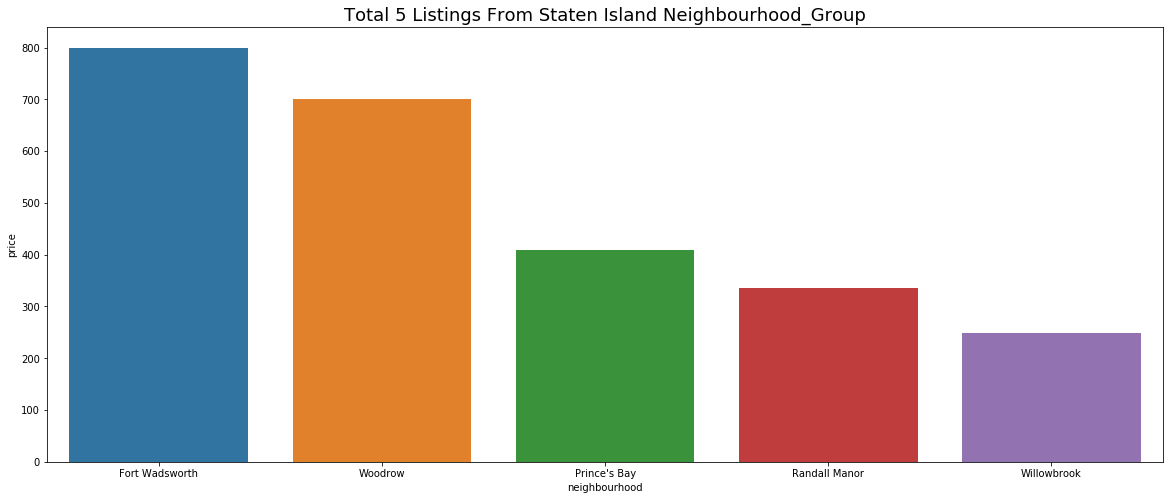

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(x='neighbourhood',y='price', data=m[(m.neighbourhood_group=='Staten Island')].nlargest(5,'price'))
plt.title('Total 5 Listings From Staten Island Neighbourhood_Group',fontsize=18)

Text(0.5, 1.0, 'Total 5 Listings From Brooklyn Neighbourhood_Group')

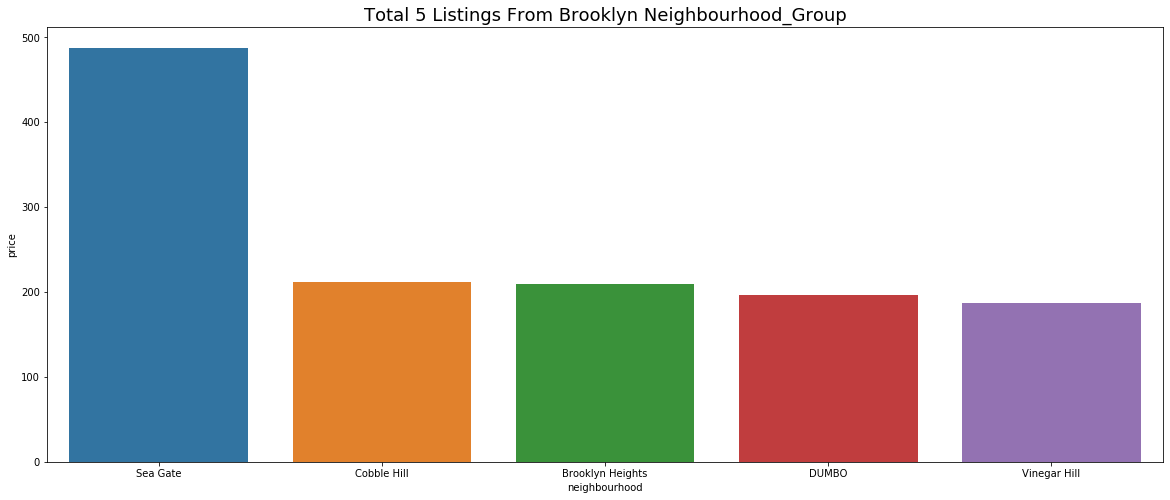

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='neighbourhood',y='price', data=m[(m.neighbourhood_group=='Brooklyn')].nlargest(5,'price'))
plt.title('Total 5 Listings From Brooklyn Neighbourhood_Group',fontsize=18)

Seat Gate of Brooklyn has the highest price. There seems to be a huge gap between area with Maximum price and other other areas.

Text(0.5, 1.0, 'Total 5 Listings From Bronx Neighbourhood_Group')

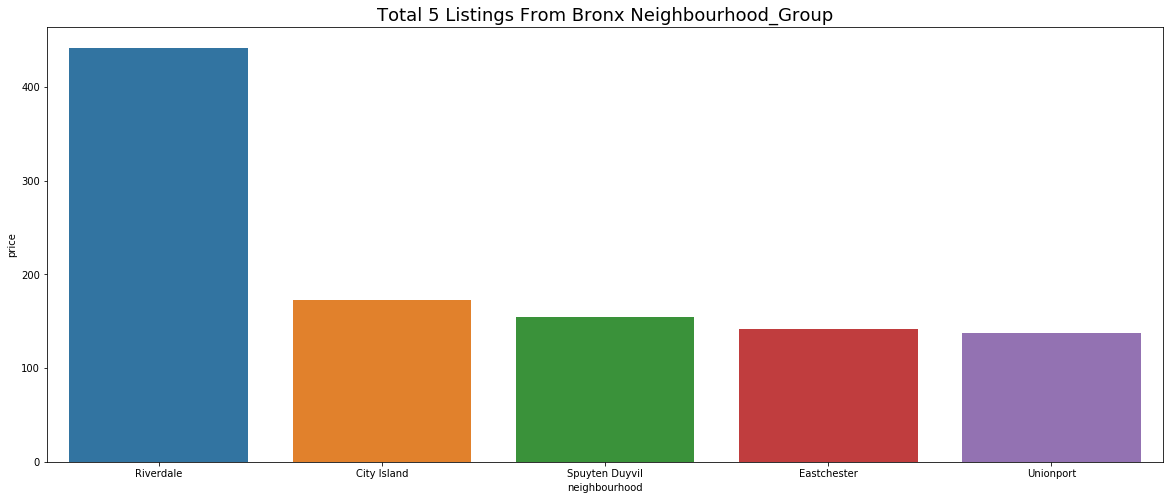

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='neighbourhood',y='price', data=m[(m.neighbourhood_group=='Bronx')].nlargest(5,'price'))
plt.title('Total 5 Listings From Bronx Neighbourhood_Group',fontsize=18)

Riverdale of Bronx has the highest price. There also seems to be a huge gap between area with Maximum price and other other areas.

Text(0.5, 1.0, 'Total 5 Listings From Manhattan Neighbourhood_Group')

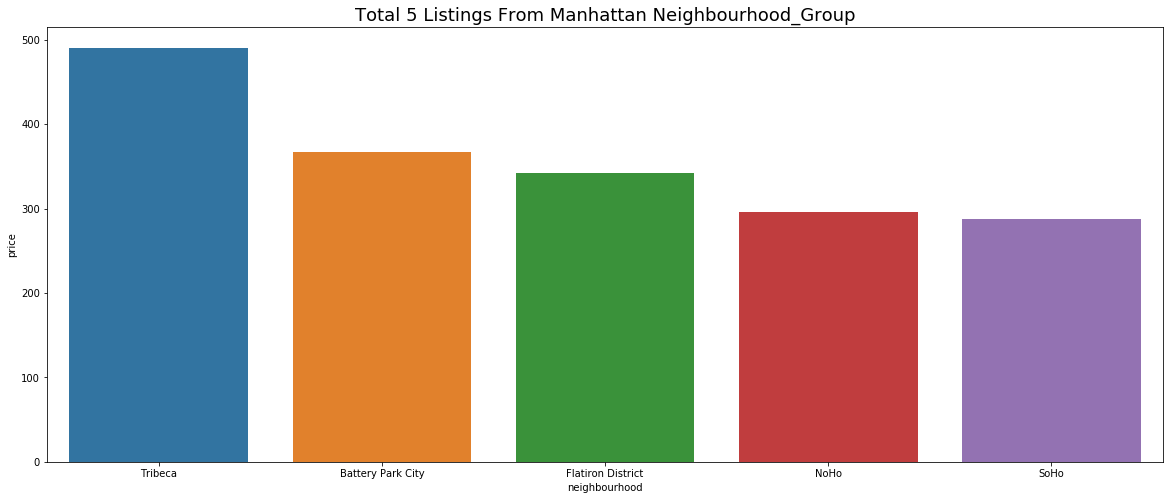

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x='neighbourhood',y='price', data=m[(m.neighbourhood_group=='Manhattan')].nlargest(5,'price'))
plt.title('Total 5 Listings From Manhattan Neighbourhood_Group',fontsize=18)

Tribeca of Manhattan has the highest priced rooms. The diference in top 5 mean prices of neighbours is gradually decreasing.

Text(0.5, 1.0, 'Types Of Room Segregated by Neighbourhood_group and their Count in Data')

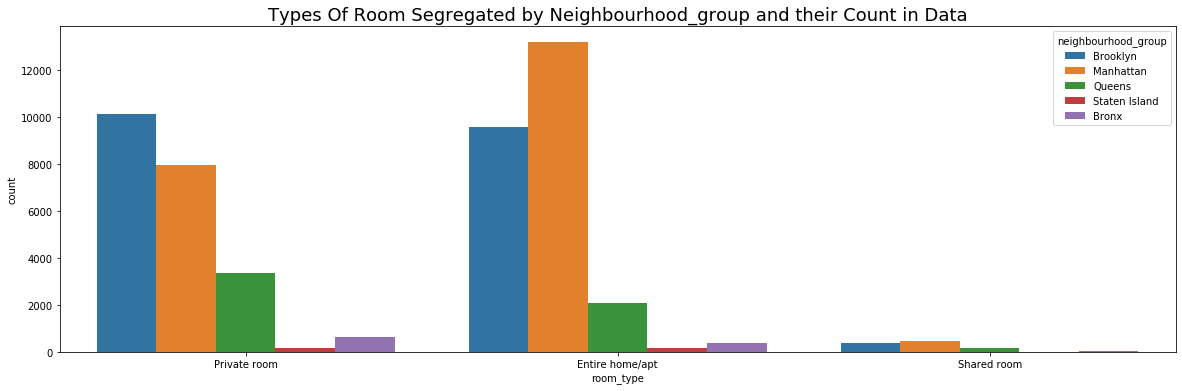

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'room_type', data=df , hue = 'neighbourhood_group')
plt.title('Types Of Room Segregated by Neighbourhood_group and their Count in Data',fontsize=18)

The entire home/apt seems to be listed more/available in Manhattan which means people prefer to live in an apartment there and Private room type in Brooklyn. As you can see there is a huge difference between the prefernce in private rooms and entire apt in Manhattan.

People respect their privacy and dont prefer shared rooms.

Text(0.5, 1.0, 'Types Of Room V/s Their Price Segregated by Neighbourhood_group')

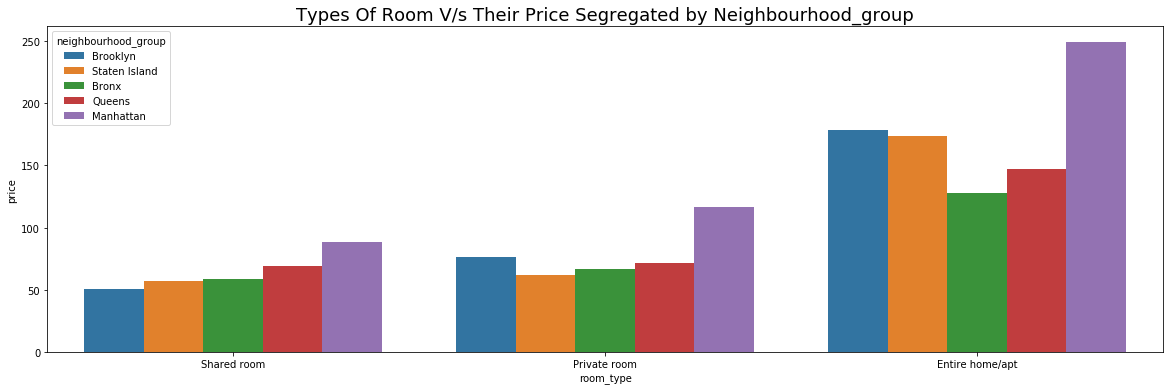

In [48]:
plt.figure(figsize=(20,6))
sns.barplot(x='room_type', y = 'price', hue = 'neighbourhood_group', data=pd.DataFrame(df.groupby(['room_type','neighbourhood_group'])['price'].agg({'price':'mean'}).sort_values('price').reset_index()))
plt.title('Types Of Room V/s Their Price Segregated by Neighbourhood_group',fontsize=18)

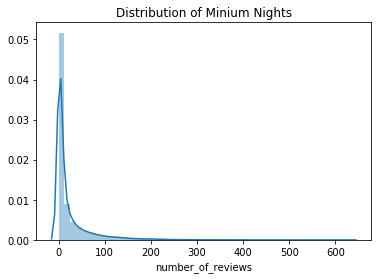

In [49]:
plt.title('Distribution of Minium Nights')
sns.distplot(df['number_of_reviews'])

#### As you can see there are huge outliers in this column.

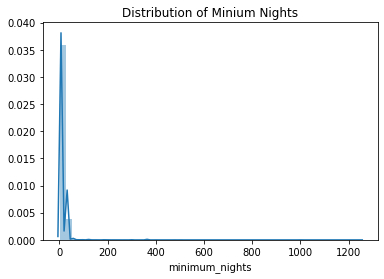

In [50]:
plt.title('Distribution of Minium Nights')
sns.distplot(df['minimum_nights'])

We can observe maximum minimum_nights booking are 1,2 and 3 nights.

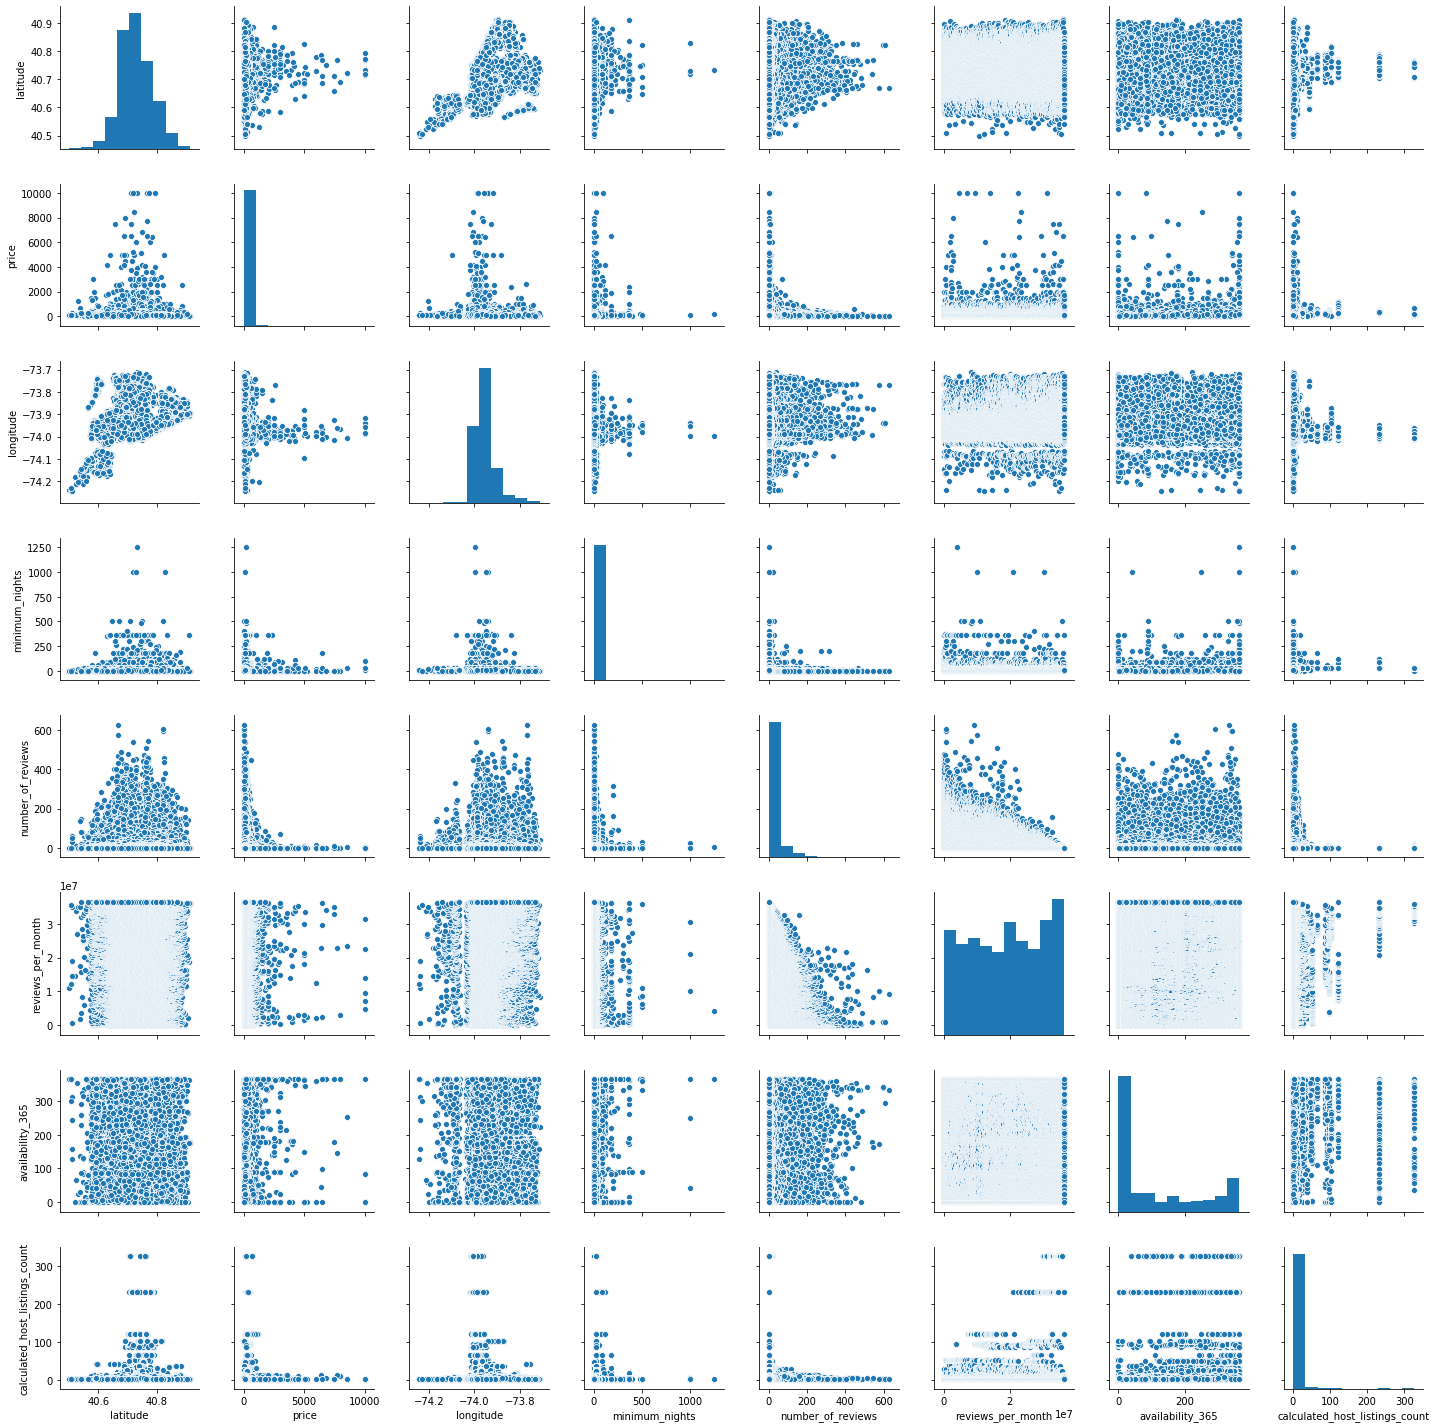

In [51]:
sns.pairplot(df[['latitude','price','longitude','minimum_nights','number_of_reviews','reviews_per_month','availability_365',
                'calculated_host_listings_count']])
plt.show() 

Text(0.5, 1.0, 'Types Of Room V/s Their Price Segregated by Neighbourhood_group')

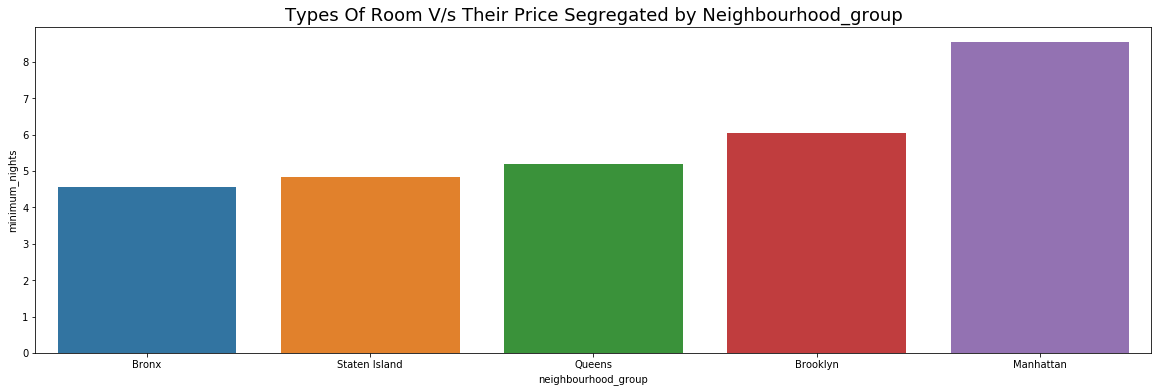

In [52]:
plt.figure(figsize=(20,6))
sns.barplot(y='minimum_nights',x = 'neighbourhood_group', data=df.groupby('neighbourhood_group')['minimum_nights'].agg({'minimum_nights':'mean'}).sort_values('minimum_nights').reset_index())
plt.title('Types Of Room V/s Their Price Segregated by Neighbourhood_group',fontsize=18)

The overall range of minimum nights stayed in all of the neighbourhoods is 0 to 9. The individual distribution is show in this figure.

Text(0.5, 1.0, 'Types Of Room V/s Their Price Segregated by Neighbourhood_group')

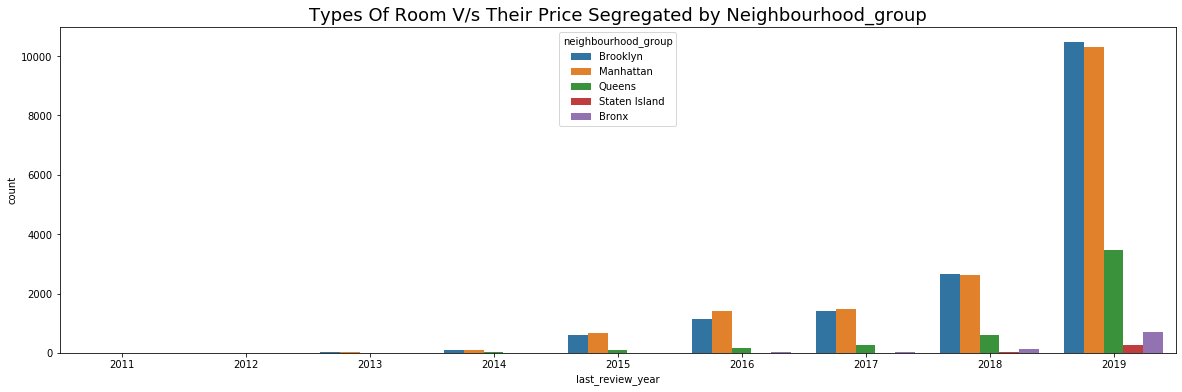

In [53]:
plt.figure(figsize=(20,6))
sns.countplot(x='last_review_year',hue = 'neighbourhood_group', data=df[df.last_review_year!=1990] )
plt.title('Types Of Room V/s Their Price Segregated by Neighbourhood_group',fontsize=18)

# Dealing with Outliers

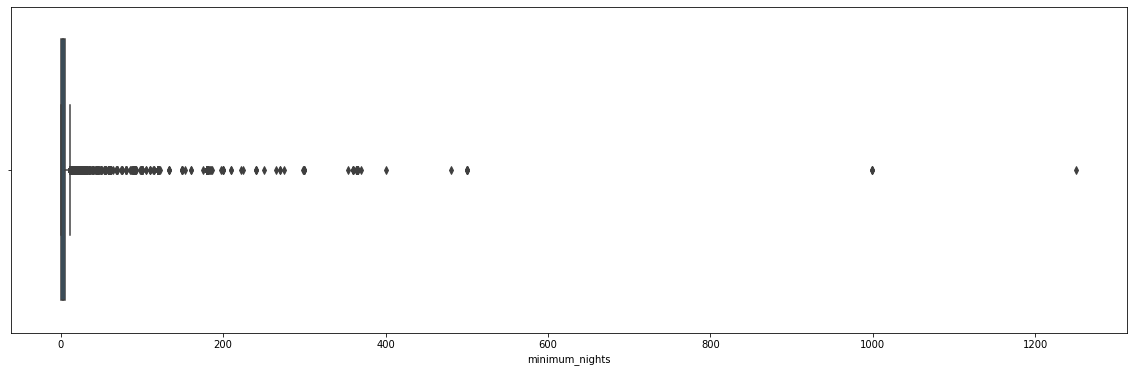

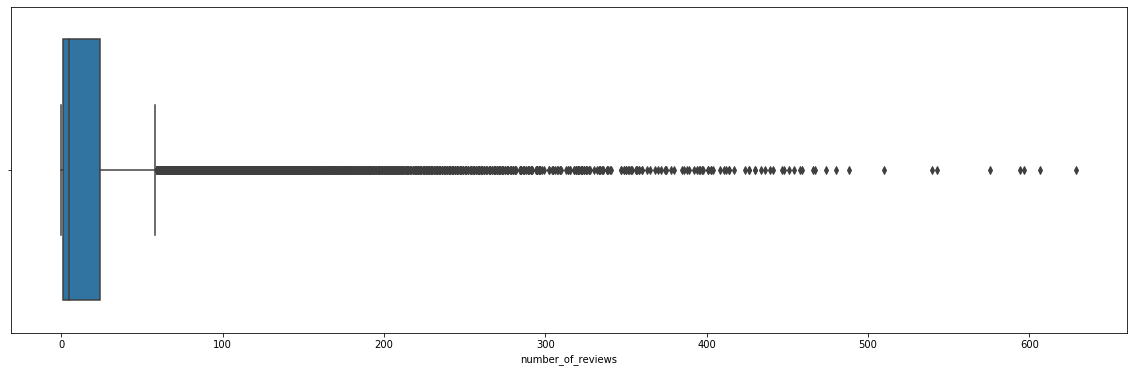

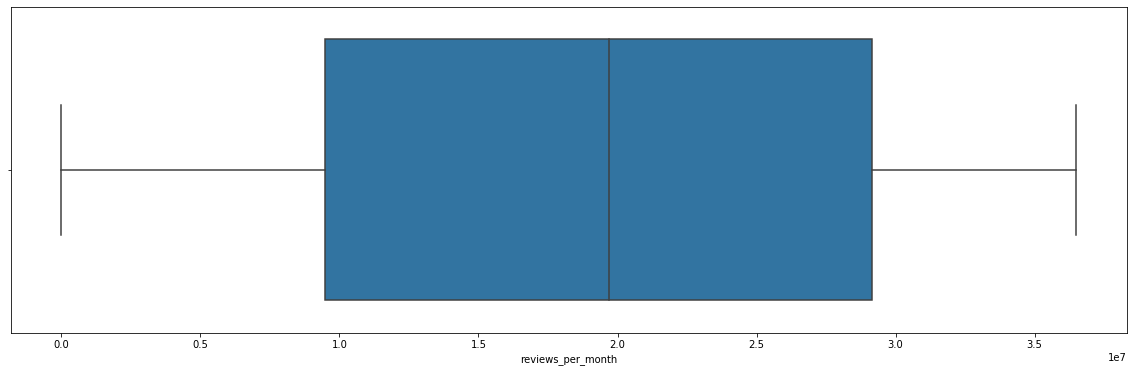

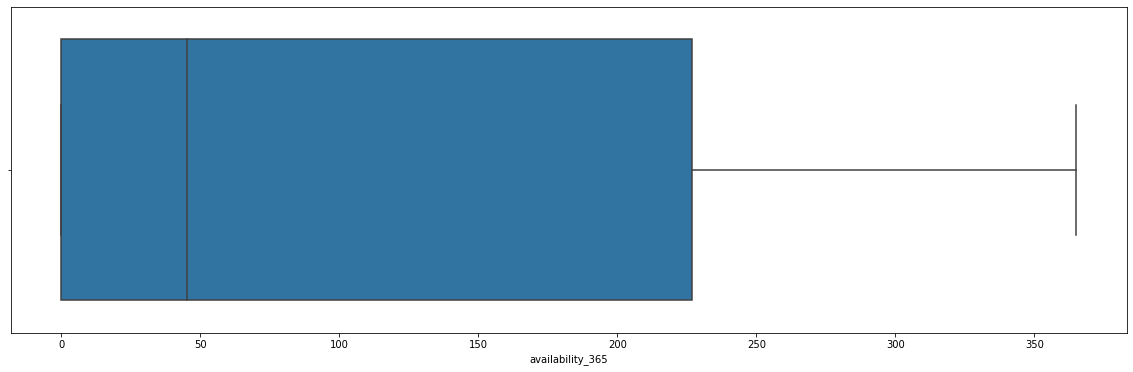

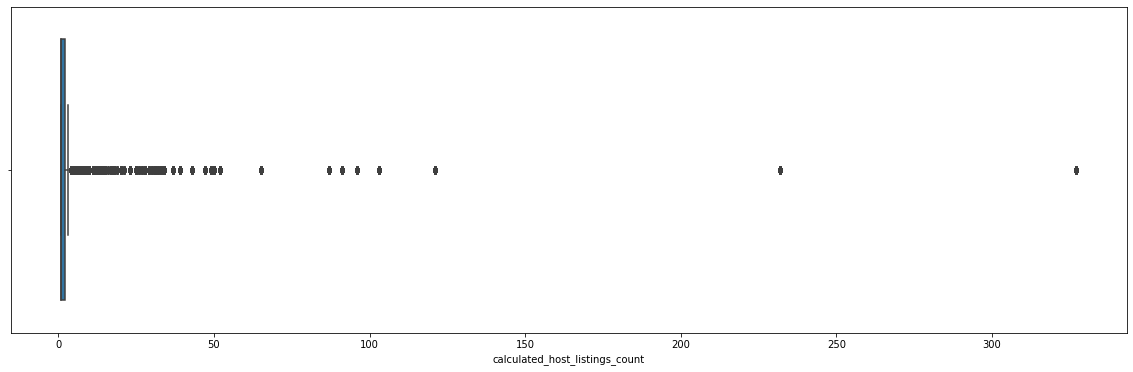

In [54]:
for i in ['minimum_nights','number_of_reviews','reviews_per_month','availability_365',
                'calculated_host_listings_count']:
    plt.figure(figsize=(20,6))
    sns.boxplot(df[i])
    plt.show()

In [55]:
pd.set_option('display.max_rows', 500)
df[df['calculated_host_listings_count']>300][['minimum_nights','number_of_reviews']]

,minimum_nights,number_of_reviews
38293,29,0
38294,29,1
38588,29,1
39769,2,8
39770,2,14
39771,2,4
39772,29,1
39773,29,1
39774,2,7
39775,29,1


As we can see the boxplot and from google answers the maximum stay can be 100 days so we take that cutoff and remove those above that considering them as outliers

In [56]:
df.drop(df.loc[df['minimum_nights']>100].index, inplace=True)

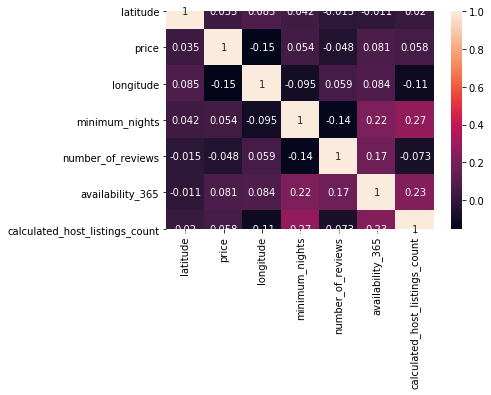

In [57]:
sns.heatmap(df[['latitude','price','longitude','minimum_nights','number_of_reviews','reviews_per_month','availability_365',
                'calculated_host_listings_count']].corr(),annot=True)

In [58]:
df.drop(['name','host_name','id','host_id','room_type','neighbourhood_group','neighbourhood','last_review'],axis=1,inplace=True)

In [59]:
df=df.sample(10000)

In [60]:
X = df.drop(['price'],axis=1)
y = df.price

# [8] Making the train test split & Using Appropriate Scaling

In [61]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# [9] Fitting The Models

In [62]:
Model_Scoring = pd.DataFrame(columns=['Model','Train Score', 'Test Score','RMSE'])

Model=[]
Train_Score=[]
Test_Score=[]
RMSE=[]

### 1. Linear Regression With Bagging

In [63]:
from sklearn.ensemble import BaggingRegressor

lreg = LinearRegression()
bggng = BaggingRegressor(lreg, n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bggng.fit(X_train, y_train)

y_pred = bggng.predict(X_test)

print('Train score For Linear Regressor With Bagging: {:.4f} %'.format(bggng.score(X_train, y_train)*100))
print('Test score For Linear Regressor With Bagging: {:.4f} %'.format(bggng.score(X_test, y_test)*100))
print('RMSE For Linear Regressor With Bagging: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


Model.append("Linear Regressor With Bagging")
Train_Score.append(bggng.score(X_train, y_train))
Test_Score.append(bggng.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))


Train score For Linear Regressor With Bagging: -2182553391620230691684352.0000 %
Test score For Linear Regressor With Bagging: -779778965132215081500672.0000 %
RMSE For Linear Regressor With Bagging: 27896746462835.9336


### 2. SGD Regression With Bagging

In [64]:
sgd_reg = SGDRegressor()
bggng = BaggingRegressor(sgd_reg, n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bggng.fit(X_train, y_train)

y_pred = bggng.predict(X_test)

print('Train score For SGD Regressor With Bagging: {:.4f} %'.format(bggng.score(X_train, y_train)*100))
print('Test score For SGD Regressor With Bagging: {:.4f} %'.format(bggng.score(X_test, y_test)*100))
print('RMSE For SGD Regressor With Bagging: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("SGD Regression With Bagging")
Train_Score.append(bggng.score(X_train, y_train))
Test_Score.append(bggng.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))


Train score For SGD Regressor With Bagging: 14.1987 %
Test score For SGD Regressor With Bagging: 5.3064 %
RMSE For SGD Regressor With Bagging: 307.4172


### 3. Decision Tree Regressor With Pasting

In [65]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)
psting = BaggingRegressor(dtree, n_estimators=100, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
psting.fit(X_train, y_train)

y_pred = psting.predict(X_test)

print('Train score For Decision Tree Regressor With Pasting: {:.4f} %'.format(psting.score(X_train, y_train)*100))
print('Test score For Decision Tree With Pasting: {:.4f} %'.format(psting.score(X_test, y_test)*100))
print('RMSE For Decision Tree With Pasting: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Decision Tree Regression With Pasting")
Train_Score.append(psting.score(X_train, y_train))
Test_Score.append(psting.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))


Train score For Decision Tree Regressor With Pasting: 19.4294 %
Test score For Decision Tree With Pasting: 7.1401 %
RMSE For Decision Tree With Pasting: 304.4261


### 4. Ridge Regression with Pasting

In [66]:
ridge = Ridge(random_state=0)
psting = BaggingRegressor(ridge, n_estimators=100, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
psting.fit(X_train, y_train)

y_pred = psting.predict(X_test)

print('Train score For Decision Tree Regressor With Pasting: {:.4f} %'.format(psting.score(X_train, y_train)*100))
print('Test score For Decision Tree With Pasting: {:.4f} %'.format(psting.score(X_test, y_test)*100))
print('RMSE For Decision Tree With Pasting: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Ridge Regression With Pasting")
Train_Score.append(psting.score(X_train, y_train))
Test_Score.append(psting.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For Decision Tree Regressor With Pasting: 17.8989 %
Test score For Decision Tree With Pasting: 7.0599 %
RMSE For Decision Tree With Pasting: 304.5575


### 5. Lasso Regression with AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostRegressor

lasso = Lasso(random_state=0)
adabst = AdaBoostRegressor(lasso, n_estimators=100, random_state=0, learning_rate=0.1)
adabst.fit(X_train, y_train)

y_pred = adabst.predict(X_test)

print('Train score For Lasso Regression With Adaboost Boosting: {:.4f} %'.format(adabst.score(X_train, y_train)*100))
print('Test score For Lasso Regression With Adaboost Boosting: {:.4f} %'.format(adabst.score(X_test, y_test)*100))
print('RMSE For Lasso Regression With Adaboost Boosting: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Lasso Regression With Adaboost Boosting")
Train_Score.append(adabst.score(X_train, y_train))
Test_Score.append(adabst.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For Lasso Regression With Adaboost Boosting: -200.7948 %
Test score For Lasso Regression With Adaboost Boosting: -65.8376 %
RMSE For Lasso Regression With Adaboost Boosting: 406.8266


### 6. SVR Linear Kernel With Adaboost Boosting

In [68]:
svrl=SVR(kernel='linear')

adabst = AdaBoostRegressor(svrl, n_estimators=1, random_state=0, learning_rate=0.1)
adabst.fit(X_train, y_train)

y_pred = adabst.predict(X_test)

print('Train score For SVR Linear Kernel With Adaboost Boosting: {:.4f} %'.format(adabst.score(X_train, y_train)*100))
print('Test score For SVR Linear Kernel With Adaboost Boosting: {:.4f} %'.format(adabst.score(X_test, y_test)*100))
print('RMSE For SVR Linear Kernel With Adaboost Boosting: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("SVR Linear Kernel With Adaboost Boosting")
Train_Score.append(adabst.score(X_train, y_train))
Test_Score.append(adabst.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For SVR Linear Kernel With Adaboost Boosting: 12.1944 %
Test score For SVR Linear Kernel With Adaboost Boosting: 4.3599 %
RMSE For SVR Linear Kernel With Adaboost Boosting: 308.9497


### 7. SVR RBF Kernel  WIth Gradient Boosting 

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

svrlrbf=SVR(kernel='rbf', C=100)

gdbst = GradientBoostingRegressor(max_depth=2, n_estimators=100, random_state=0)
gdbst.fit(X_train, y_train)

y_pred = gdbst.predict(X_test)

print('Train score For SVR RBF Kernel With Gradient Boosting: {:.4f} %'.format(gdbst.score(X_train, y_train)*100))
print('Test score For SVR RBF Kernel With Gradient Boosting: {:.4f} %'.format(gdbst.score(X_test, y_test)*100))
print('RMSE For SVR RBF Kernel With Gradient Boosting: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("SVR RBF Kernel With Gradient Boosting")
Train_Score.append(gdbst.score(X_train, y_train))
Test_Score.append(gdbst.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))


Train score For SVR RBF Kernel With Gradient Boosting: 30.5268 %
Test score For SVR RBF Kernel With Gradient Boosting: 9.4787 %
RMSE For SVR RBF Kernel With Gradient Boosting: 300.5683


### Applying PCA On The Data

In [70]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)

X_train_PCA=pca.fit_transform(X_train)
X_test_PCA=pca.fit_transform(X_test)

In [71]:
pca=PCA(n_components=3)
X_PCA=pca.fit_transform(X)

In [72]:
np.sum(pca.explained_variance_ratio_)

0.999999999989071

# 8. KNN

### 8.1 KNN Regressor Without PCA

Text(0, 0.5, 'MSE')

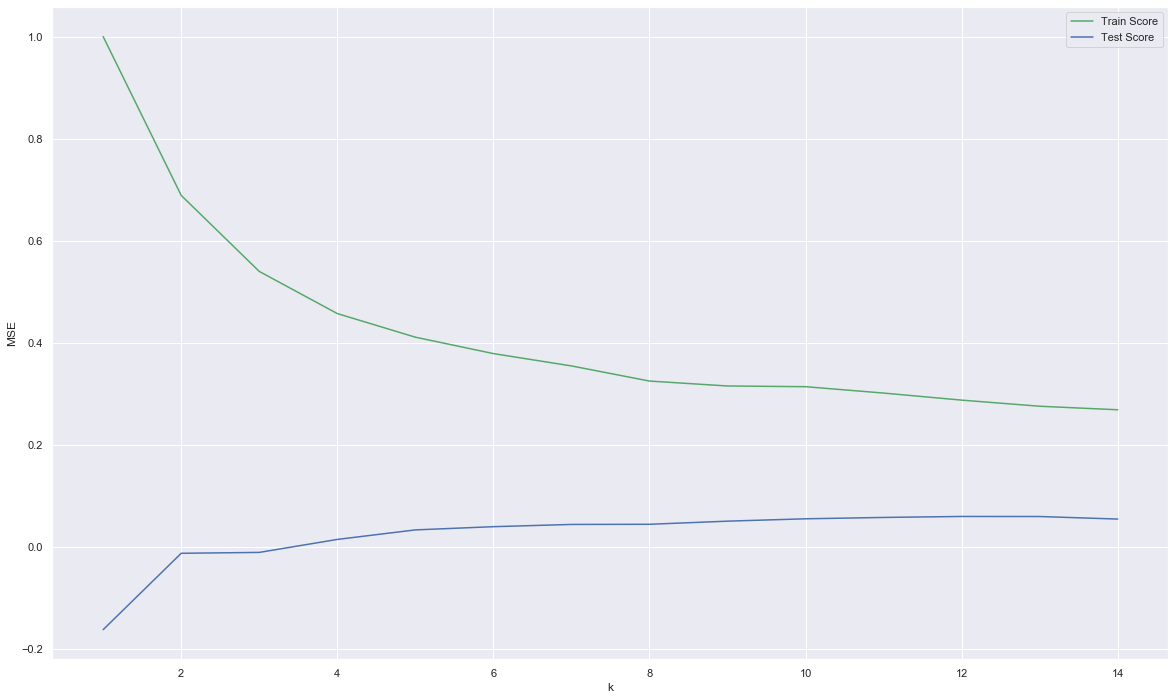

In [73]:
sns.set(rc={'figure.figsize':(20,12)})
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [74]:
knn_reg=KNeighborsRegressor(14)
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)

print('Train score For KNeighborsRegressor Without PCA: {:.4f} %'.format(knn_reg.score(X_train, y_train)*100))
print('Test score For KNeighborsRegressor Without PCA: {:.4f} %'.format(knn_reg.score(X_test, y_test)*100))
print('RMSE For KNeighborsRegressor Without PCA: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("KNeighborsRegressor Without PCA")
Train_Score.append(knn_reg.score(X_train, y_train))
Test_Score.append(knn_reg.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For KNeighborsRegressor Without PCA: 26.8823 %
Test score For KNeighborsRegressor Without PCA: 5.4663 %
RMSE For KNeighborsRegressor Without PCA: 307.1575


### 8.2 KNN With CV


In [75]:
scores = cross_val_score(knn_reg, X,y,cv=5)
print("Accuracy For Linear Regression with CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('------------------------------------------------------------------------')
scores_train = cross_val_score(knn_reg, X_train, y_train)
scores_test = cross_val_score(knn_reg, X_test, y_test)


print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print('------------------------------------------------------------------------')

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Accuracy For Linear Regression with CV: -0.06 (+/- 0.06)
------------------------------------------------------------------------
Cross-validation scores_train: [0.15357028 0.14738819 0.14579495]
Cross-validation scores_test: [0.08932255 0.05227369 0.04765621]
------------------------------------------------------------------------
Average cross-validation score_train: 0.15
Average cross-validation score_test: 0.06


### 8.3 KNN With GridSearch and Without PCA

In [76]:
param_grid_knn = {
            'leaf_size' : [1,3],
            'n_neighbors' :[3,6,7],
            'p': [1],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'brute']
            }

CV_knn = GridSearchCV(estimator=knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :-> ',CV_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   59.4s


Best Parameter :->  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.3min finished


In [77]:
knn1=CV_knn.best_estimator_

knn1.fit(X_train, y_train)

y_pred_knn=knn1.predict(X_test)

print('Train score For KNN With GridSearch and Without PCA: {:.4f} %'.format(knn1.score(X_train, y_train)*100))
print('Test score For KNN With GridSearch and Without PCA: {:.4f} %'.format(knn1.score(X_test, y_test)*100))
print('RMSE For KNN With GridSearch and Without PCA: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("KNN With GridSearch and Without PCA:")
Train_Score.append(knn1.score(X_train, y_train))
Test_Score.append(knn1.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For KNN With GridSearch and Without PCA: 100.0000 %
Test score For KNN With GridSearch and Without PCA: 4.6717 %
RMSE For KNN With GridSearch and Without PCA: 307.1575


### 8.2 KNN Regressor With PCA

In [78]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(X_train_PCA, y_train)

y_pred = knn_reg.predict(X_test_PCA)

print('Train score For KNeighborsRegressor With PCA: {:.4f} %'.format(knn_reg.score(X_train_PCA, y_train)*100))
print('Test score For KNeighborsRegressor With PCA: {:.4f} %'.format(knn_reg.score(X_test_PCA, y_test)*100))
print('RMSE For KNeighborsRegressor With PCA: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("KNeighborsRegressor With PCA")
Train_Score.append(knn_reg.score(X_train_PCA, y_train))
Test_Score.append(knn_reg.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For KNeighborsRegressor With PCA: 38.8809 %
Test score For KNeighborsRegressor With PCA: 0.6334 %
RMSE For KNeighborsRegressor With PCA: 314.9111


### 8.4. KNN With CV and PCA

In [79]:
scores = cross_val_score(knn_reg, X_PCA,y,cv=5)
print("Accuracy For Linear Regression with CV & PCA: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('------------------------------------------------------------------------')
scores_train = cross_val_score(knn_reg, X_train, y_train)
scores_test = cross_val_score(knn_reg, X_test, y_test)


print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print('------------------------------------------------------------------------')

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Accuracy For Linear Regression with CV & PCA: -0.18 (+/- 0.20)
------------------------------------------------------------------------
Cross-validation scores_train: [0.10536497 0.13642302 0.14566728]
Cross-validation scores_test: [-0.01373665 -0.00706688 -0.03275679]
------------------------------------------------------------------------
Average cross-validation score_train: 0.13
Average cross-validation score_test: -0.02


### 8.6 KNN With GridSearch and PCA

In [80]:
param_grid_knn = {
            'leaf_size' : [1,3],
            'n_neighbors' :[3,6,7],
            'p': [1],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'brute']
            }

CV_knn = GridSearchCV(estimator=knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train_PCA, y_train)

print('Best Parameter :-> ',CV_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s


Best Parameter :->  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.5s finished


In [81]:
knn1=CV_knn.best_estimator_

knn1.fit(X_train_PCA, y_train)

y_pred=knn1.predict(X_test_PCA)

print('Train score For KNN With GridSearch and With PCA: {:.4f} %'.format(knn1.score(X_train_PCA, y_train)*100))
print('Test score For KNN With GridSearch and With PCA: {:.4f} %'.format(knn1.score(X_test_PCA, y_test)*100))
print('RMSE For KNN With GridSearch and With PCA: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("KNN With GridSearch and With PCA:")
Train_Score.append(knn1.score(X_train_PCA, y_train))
Test_Score.append(knn1.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For KNN With GridSearch and With PCA: 34.9487 %
Test score For KNN With GridSearch and With PCA: 0.2355 %
RMSE For KNN With GridSearch and With PCA: 315.5409


# 9 Linear Regression

### 9.1 Linear Regression Without PCA

In [82]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred=lreg.predict(X_test)

print('Train score For Linear Regressor: {:.4f} %'.format(lreg.score(X_train, y_train)*100))
print('Test score For Linear Regressor: {:.4f} %'.format(lreg.score(X_test, y_test)*100))
print('RMSE For Linear Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Linear Regression WIthout PCA")
Train_Score.append(lreg.score(X_train, y_train))
Test_Score.append(lreg.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For Linear Regressor: 20.5499 %
Test score For Linear Regressor: -12973188984762869760.0000 %
RMSE For Linear Regressor: 113786612884.3899


Text(0.5, 0, 'RM')

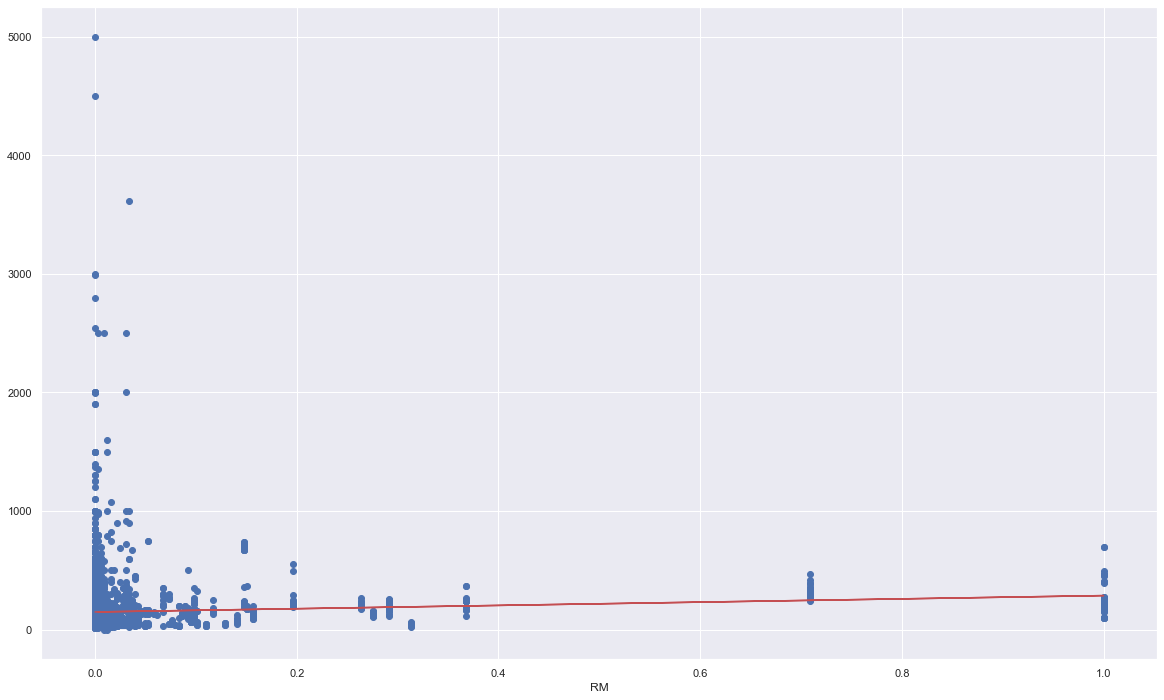

In [83]:
X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

### 9.2 Linear Regression Without CV and PCA

In [84]:
scores = cross_val_score(lreg, X,y,cv=5)
print("Accuracy For Linear Regression with CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores_train = cross_val_score(lreg, X_train, y_train)
scores_test = cross_val_score(lreg, X_test, y_test)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Accuracy For Linear Regression with CV: 0.13 (+/- 0.07)
Cross-validation scores_train: [-6.09323161e+18 -6.29565327e+22 -3.25061890e+22]
Cross-validation scores_test: [-4.33018777e+19 -9.31399468e+22 -1.13378360e+21]
Average cross-validation score_train: -31822938323773143646208.00
Average cross-validation score_test: -31439010757769949085696.00


### 9.3 Linear Regression With GridSearch and Without PCA

In [85]:
param_grid_knn = {
                'fit_intercept' : [True,False],
            'normalize' :[True,False],
            'n_jobs': [1,3,5]
            }

CV_knn = GridSearchCV(estimator=lreg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :-> ',CV_knn.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s


Best Parameter :->  {'fit_intercept': False, 'n_jobs': 1, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.9s finished


In [86]:
lreg = CV_knn.best_estimator_
lreg.fit(X_train, y_train)

y_pred=lreg.predict(X_test)

print('Train score For Linear Regressor: {:.4f} %'.format(lreg.score(X_train, y_train)*100))
print('Test score For Linear Regressor: {:.4f} %'.format(lreg.score(X_test, y_test)*100))
print('RMSE For Linear Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Linear Regression With GridSearch and WIthout PCA")
Train_Score.append(lreg.score(X_train, y_train))
Test_Score.append(lreg.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For Linear Regressor: 20.5500 %
Test score For Linear Regressor: -3166920504171532124160.0000 %
RMSE For Linear Regressor: 1777814231685.7744


### 9.2 Linear Regression WIth PCA

In [87]:
lreg = LinearRegression()
lreg.fit(X_train_PCA, y_train)

y_pred=lreg.predict(X_test_PCA)

print('Train score For Linear Regressor: {:.4f} %'.format(lreg.score(X_train_PCA, y_train)*100))
print('Test score For Linear Regressor: {:.4f} %'.format(lreg.score(X_test_PCA, y_test)*100))
print('RMSE For Linear Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Linear Regression With PCA")
Train_Score.append(lreg.score(X_train_PCA, y_train))
Test_Score.append(lreg.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For Linear Regressor: 12.4274 %
Test score For Linear Regressor: 5.2024 %
RMSE For Linear Regressor: 307.5860


### 9.4. Linear Regression With CV and PCA

In [88]:
scores = cross_val_score(lreg, X_PCA,y,cv=5)
print("Accuracy For Linear Regression with CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('------------------------------------------------------------------------')
scores_train = cross_val_score(knn_reg, X_train, y_train)
scores_test = cross_val_score(knn_reg, X_test, y_test)


print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print('------------------------------------------------------------------------')

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Accuracy For Linear Regression with CV: 0.01 (+/- 0.01)
------------------------------------------------------------------------
Cross-validation scores_train: [0.10536497 0.13642302 0.14566728]
Cross-validation scores_test: [-0.01373665 -0.00706688 -0.03275679]
------------------------------------------------------------------------
Average cross-validation score_train: 0.13
Average cross-validation score_test: -0.02


### 9.6 Linear Regression With GridSearch and With PCA

In [89]:
param_grid_knn = {
                'fit_intercept' : [True,False],
            'normalize' :[True,False],
            'n_jobs': [1,3,5]
            }

CV_knn = GridSearchCV(estimator=lreg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train_PCA, y_train)

print('Best Parameter :-> ',CV_knn.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Parameter :->  {'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished


In [90]:
lreg = CV_knn.best_estimator_
lreg.fit(X_train_PCA, y_train)

y_pred=lreg.predict(X_test_PCA)

print('Train score For Linear Regressor: {:.4f} %'.format(lreg.score(X_train_PCA, y_train)*100))
print('Test score For Linear Regressor: {:.4f} %'.format(lreg.score(X_test_PCA, y_test)*100))
print('RMSE For Linear Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("Linear Regression With GridSearch & PCA")
Train_Score.append(lreg.score(X_train_PCA, y_train))
Test_Score.append(lreg.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For Linear Regressor: 12.4274 %
Test score For Linear Regressor: 5.2024 %
RMSE For Linear Regressor: 307.5860


### 10. SGD Regression

### 10.1 SGD Refression Without PCA

In [91]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

y_pred=sgd_reg.predict(X_test)

print('Train score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_train, y_train)*100))
print('Test score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_test, y_test)*100))
print('RMSE For SGD Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


Model.append("SGD Regression Without PCA")
Train_Score.append(sgd_reg.score(X_train, y_train))
Test_Score.append(sgd_reg.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For SGD Regressor: 19.6335 %
Test score For SGD Regressor: 7.6012 %
RMSE For SGD Regressor: 303.6694


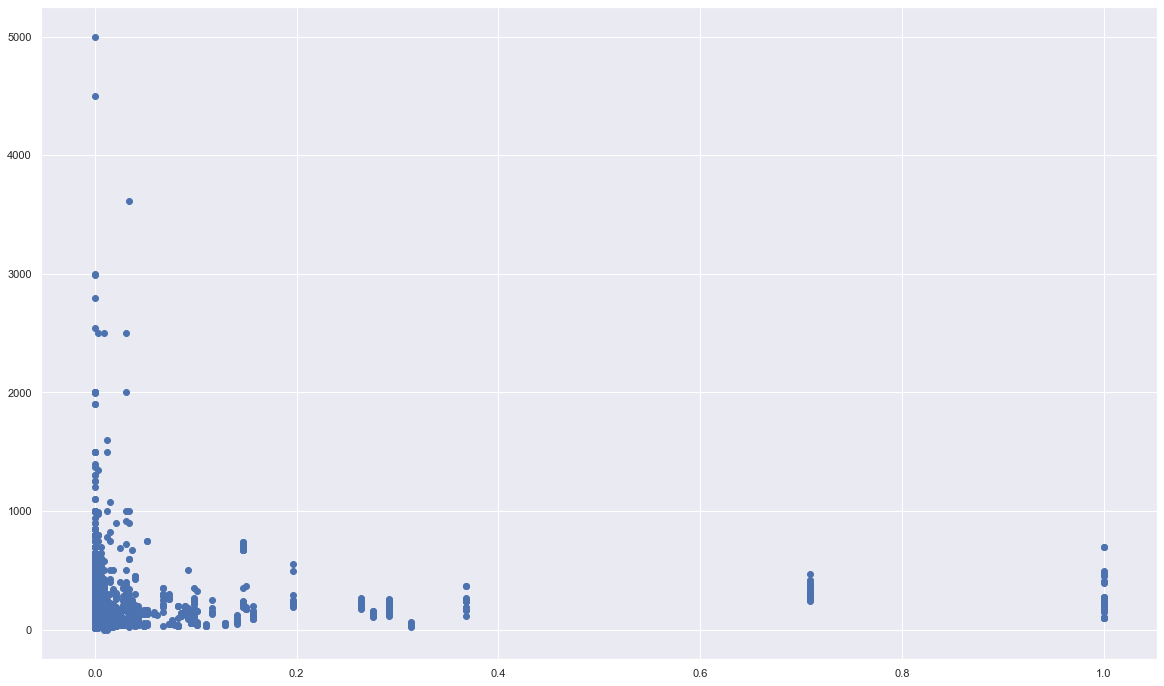

In [92]:
X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)

### 10.2 SGD Regression With GridSearchCV

In [93]:
param_grid_knn = {
                'loss' : ['squared_loss','epsilon_insensitive'],
            'penalty' :['l2','l1'],
            'alpha': [0.001,0.01,0.1],
            'max_iter':[100,200]            
}

CV_knn = GridSearchCV(estimator=sgd_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :-> ',CV_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.8s finished


Best Parameter :->  {'alpha': 0.001, 'loss': 'squared_loss', 'max_iter': 100, 'penalty': 'l2'}


In [94]:
sgd_reg = CV_knn.best_estimator_
sgd_reg.fit(X_train_PCA, y_train)

y_pred=sgd_reg.predict(X_test_PCA)

print('Train score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_train_PCA, y_train)*100))
print('Test score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_test_PCA, y_test)*100))
print('RMSE For SGD Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


Model.append("SGD Regression Without PCA")
Train_Score.append(sgd_reg.score(X_train_PCA, y_train))
Test_Score.append(sgd_reg.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For SGD Regressor: 12.4125 %
Test score For SGD Regressor: 5.1445 %
RMSE For SGD Regressor: 307.6799


### 10.3 SGD Regression With PCA

In [95]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_PCA, y_train)

y_pred=sgd_reg.predict(X_test_PCA)

print('Train score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_train_PCA, y_train)*100))
print('Test score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_test_PCA, y_test)*100))
print('RMSE For SGD Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Model.append("SGD Regression With PCA")
Train_Score.append(sgd_reg.score(X_train_PCA, y_train))
Test_Score.append(sgd_reg.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For SGD Regressor: 12.4263 %
Test score For SGD Regressor: 5.1950 %
RMSE For SGD Regressor: 307.5979


### 10.4 SGD Regression With GridSearchCV & PCA

In [96]:
param_grid_knn = {
                'loss' : ['squared_loss','epsilon_insensitive'],
            'penalty' :['l2','l1'],
            'alpha': [0.001,0.01,0.1],
            'max_iter':[100,200]            
}

CV_knn = GridSearchCV(estimator=sgd_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train_PCA, y_train)

print('Best Parameter :-> ',CV_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s


Best Parameter :->  {'alpha': 0.01, 'loss': 'squared_loss', 'max_iter': 100, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished


In [97]:
sgd_reg = CV_knn.best_estimator_
sgd_reg.fit(X_train_PCA, y_train)

y_pred=sgd_reg.predict(X_test_PCA)

print('Train score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_train_PCA, y_train)*100))
print('Test score For SGD Regressor: {:.4f} %'.format(sgd_reg.score(X_test_PCA, y_test)*100))
print('RMSE For SGD Regressor: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))


Model.append("SGD Regression With GridSearch and With PCA")
Train_Score.append(sgd_reg.score(X_train_PCA, y_train))
Test_Score.append(sgd_reg.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score For SGD Regressor: 12.3947 %
Test score For SGD Regressor: 5.1182 %
RMSE For SGD Regressor: 307.7226


### 11.. Polynomial Regression

In [98]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.2001985742886706, 0.22309177515846157]
[-1.5880868789533968e+26, -2.1173834445252967e+27]


In [99]:
print(train_score_list)
print(test_score_list)

[0.2001985742886706, 0.22309177515846157]
[-1.5880868789533968e+26, -2.1173834445252967e+27]


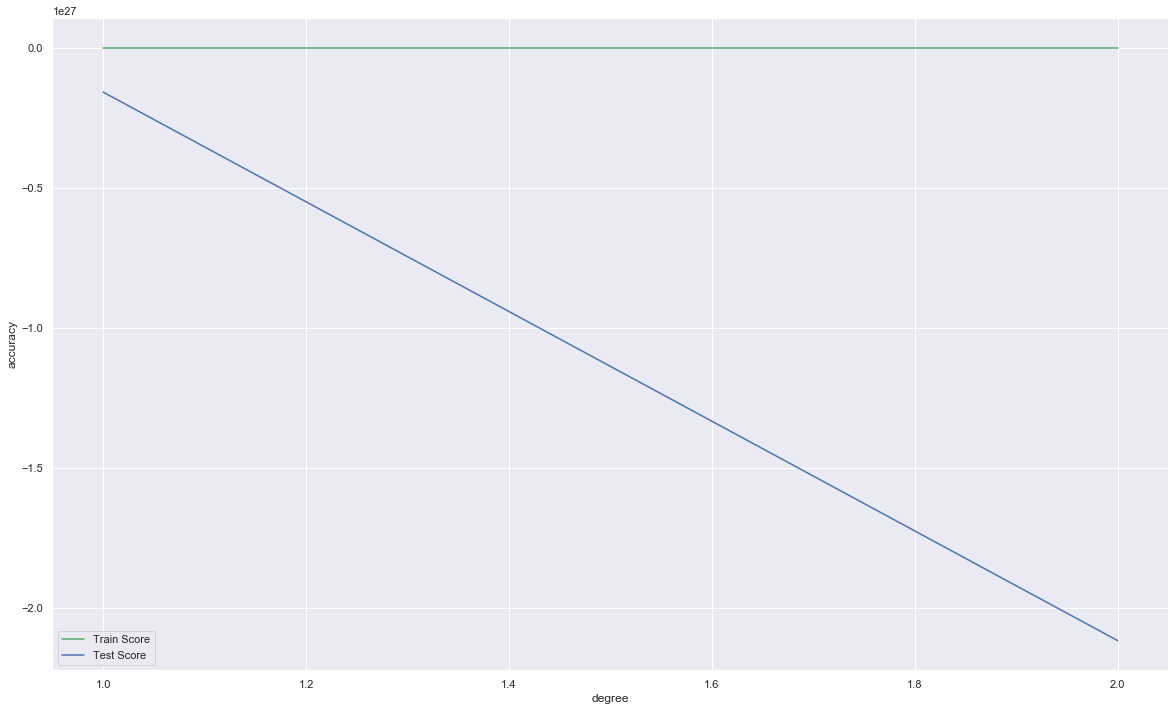

In [100]:
x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

Here We can see that if the data is as usual with degree 2 the scores are the best

### 11.1 Polynomial Regression Without PCA

In [101]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lreg.fit(X_train_poly, y_train)

y_pred_poly=lreg.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('r2_score :', lreg.score(X_test_poly,y_test))

Model.append("Polynomial Regression with Degree 2")
Train_Score.append(lreg.score(X_train_poly, y_train))
Test_Score.append(lreg.score(X_test_poly, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_poly)))

Train score: 22.3092 %
Test score: -211738344452529684967629783040.0000 %
RMSE: 14536757781554738.0000
r2_score : -2.1173834445252967e+27


### 11.2 Polynomial Regression With PCA

In [102]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_PCA)
X_test_poly = poly.transform(X_test_PCA)
lreg.fit(X_train_poly, y_train)

y_pred_poly=lreg.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('r2_score :', lreg.score(X_test_poly,y_test))

Model.append("Polynomial Regression With PCA with Degree 2")
Train_Score.append(lreg.score(X_train_poly, y_train))
Test_Score.append(lreg.score(X_test_poly, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_poly)))

Train score: 13.6451 %
Test score: 4.7972 %
RMSE: 308.2427
r2_score : 0.047971568732221415


Even the Ploynomial Regression gives a bad fit. So we will try Lasso and Ridge to Penalize the data.

### 12. Ridge Regression

### 11.1 Ridge Regression Without PCA

In [103]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Model.append("Ridge Regression Without PCA")
Train_Score.append(ridge.score(X_train, y_train))
Test_Score.append(ridge.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score: 0.2040
Test score: 0.0755


### 11.2 Ridge Regression With GridSearchCV and WIthout PCA

In [104]:
param_grid_knn = {
                'alpha' : [1,10,20,50],
                'max_iter':[100,200]            
}

CV_knn = GridSearchCV(estimator=ridge, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :->',CV_knn.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Parameter :-> {'alpha': 20, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.0s finished


In [105]:
ridge = CV_knn.best_estimator_
ridge.fit(X_train,y_train)

y_pred=ridge.predict(X_test)

print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Model.append("Ridge Regression With GridSearch and Without PCA")
Train_Score.append(ridge.score(X_train, y_train))
Test_Score.append(ridge.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score: 0.1962
Test score: 0.0757


### 11.3 Ridge With PCA

In [106]:
ridge = Ridge(random_state=0)
ridge.fit(X_train_PCA,y_train)
y_pred=ridge.predict(X_test_PCA)

print('Ridge Intercept',ridge.intercept_)
print('Ridge Coefficient',ridge.coef_)
print('---------------------------------------------------------------')
print('Train score: {:.4f}'.format(ridge.score(X_train_PCA,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_PCA, y_test)))

Model.append("Ridge Regression With PCA")
Train_Score.append(ridge.score(X_train_PCA, y_train))
Test_Score.append(ridge.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Ridge Intercept 151.17800000000003
Ridge Coefficient [-84.0012408  -26.04431109 -15.9027498 ]
---------------------------------------------------------------
Train score: 0.1243
Test score: 0.0520


### 11.4 Ridge Using PCA and GridSearch

In [107]:
param_grid_knn = {
                'alpha' : [1,10,20,50],
                'max_iter':[100,200]            
}

CV_knn = GridSearchCV(estimator=ridge, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :->',CV_knn.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Parameter :-> {'alpha': 20, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.3s finished


In [108]:
ridge = CV_knn.best_estimator_
ridge.fit(X_train_PCA,y_train)

y_pred=ridge.predict(X_test_PCA)

print('Train score: {:.4f}'.format(ridge.score(X_train_PCA,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_PCA, y_test)))

Model.append("Ridge Regression Without PCA")
Train_Score.append(ridge.score(X_train_PCA, y_train))
Test_Score.append(ridge.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Train score: 0.1243
Test score: 0.0520


Ridge is Underfittting at this point of time. This is maybe due to computational limitations we have taken less that and by increasing the data we can deal with this problem

# Feature Importance from Ridge

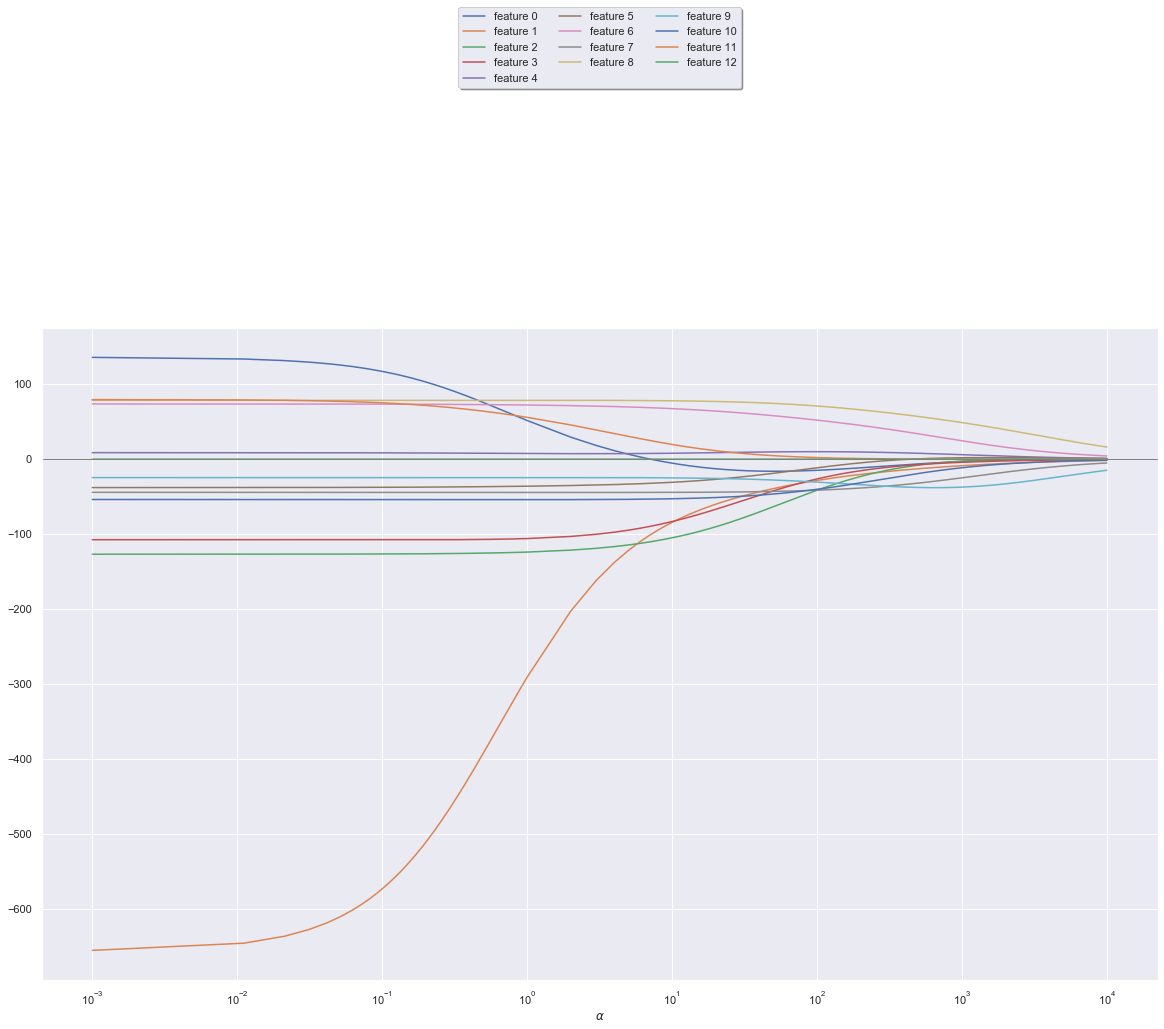

In [109]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Feature 8 is the Most Important followed by Feature 6 while Feature 7 is the least important one.

### Ridge Using CV

In [110]:
scores = cross_val_score(ridge, X,y,cv=5)
print("Accuracy For Linear Regression with CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('------------------------------------------------------------------------')
scores_train = cross_val_score(knn_reg, X_train, y_train)
scores_test = cross_val_score(knn_reg, X_test, y_test)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print('------------------------------------------------------------------------')

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Accuracy For Linear Regression with CV: 0.06 (+/- 0.03)
------------------------------------------------------------------------
Cross-validation scores_train: [0.10536497 0.13642302 0.14566728]
Cross-validation scores_test: [-0.01373665 -0.00706688 -0.03275679]
------------------------------------------------------------------------
Average cross-validation score_train: 0.13
Average cross-validation score_test: -0.02


### Ridge Using CV and PCA

In [111]:
scores = cross_val_score(ridge, X_PCA,y,cv=5)
print("Accuracy For Linear Regression with CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('------------------------------------------------------------------------')
scores_train = cross_val_score(ridge, X_train_PCA, y_train)
scores_test = cross_val_score(ridge, X_test_PCA, y_test)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print('------------------------------------------------------------------------')

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Accuracy For Linear Regression with CV: 0.01 (+/- 0.01)
------------------------------------------------------------------------
Cross-validation scores_train: [0.04755665 0.04170928 0.05126408]
Cross-validation scores_test: [0.00683366 0.008662   0.00829003]
------------------------------------------------------------------------
Average cross-validation score_train: 0.05
Average cross-validation score_test: 0.01


# 12. Lasso

### 12.1 Lasso Without PCA

In [112]:
lasso = Lasso()
lasso.fit(X_train,y_train)

y_pred_lasso=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test,y_test))


Model.append("Lasso Regression Without PCA")
Train_Score.append(lasso.score(X_train, y_train))
Test_Score.append(lasso.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

Train score: 16.5501 %
Test score: 6.3661 %
RMSE: 305.6923
r2_score : 0.06366065350423211


### 12.2 Lasso With GridSearchCV

In [113]:
param_grid_knn = {
                'alpha' : [1,10,20,50],
                'max_iter':[100,200]            
}

CV_knn = GridSearchCV(estimator=lasso, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :->',CV_knn.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Parameter :-> {'alpha': 1, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.2s finished


In [114]:
lasso = CV_knn.best_estimator_
lasso.fit(X_train,y_train)

y_pred_lasso=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test,y_test))


Model.append("Lasso Regression With GridSearch and Without PCA")
Train_Score.append(lasso.score(X_train, y_train))
Test_Score.append(lasso.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

Train score: 16.5501 %
Test score: 6.3661 %
RMSE: 305.6923
r2_score : 0.06366065350423211


### 12.3 Lasso With PCA

In [115]:
lasso = Lasso()
lasso.fit(X_train_PCA,y_train)

y_pred_lasso=lasso.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(lasso.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test_PCA,y_test))


Model.append("Lasso Regression WIth PCA")
Train_Score.append(lasso.score(X_train_PCA, y_train))
Test_Score.append(lasso.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

Train score: 12.3983 %
Test score: 5.1074 %
RMSE: 307.7400
r2_score : 0.051073948774717604


### 12.4 Lasso With PCA and GridSearchCV

In [116]:
param_grid_knn = {
                'alpha' : [1,10,20,50],
                'max_iter':[100,200]            
}

CV_knn = GridSearchCV(estimator=lasso, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)

CV_knn.fit(X_train, y_train)

print('Best Parameter :->',CV_knn.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Parameter :-> {'alpha': 1, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.4s finished


In [117]:
lasso = CV_knn.best_estimator_
lasso.fit(X_train_PCA,y_train)

y_pred_lasso=lasso.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(lasso.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test_PCA,y_test))


Model.append("Lasso Regression With PCA and GridSearchCV")
Train_Score.append(lasso.score(X_train_PCA, y_train))
Test_Score.append(lasso.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

Train score: 12.3983 %
Test score: 5.1074 %
RMSE: 307.7400
r2_score : 0.051073948774717604


We still see an underfitting which means we would move to Tree Algo's

## Feature Importance based on LASSO

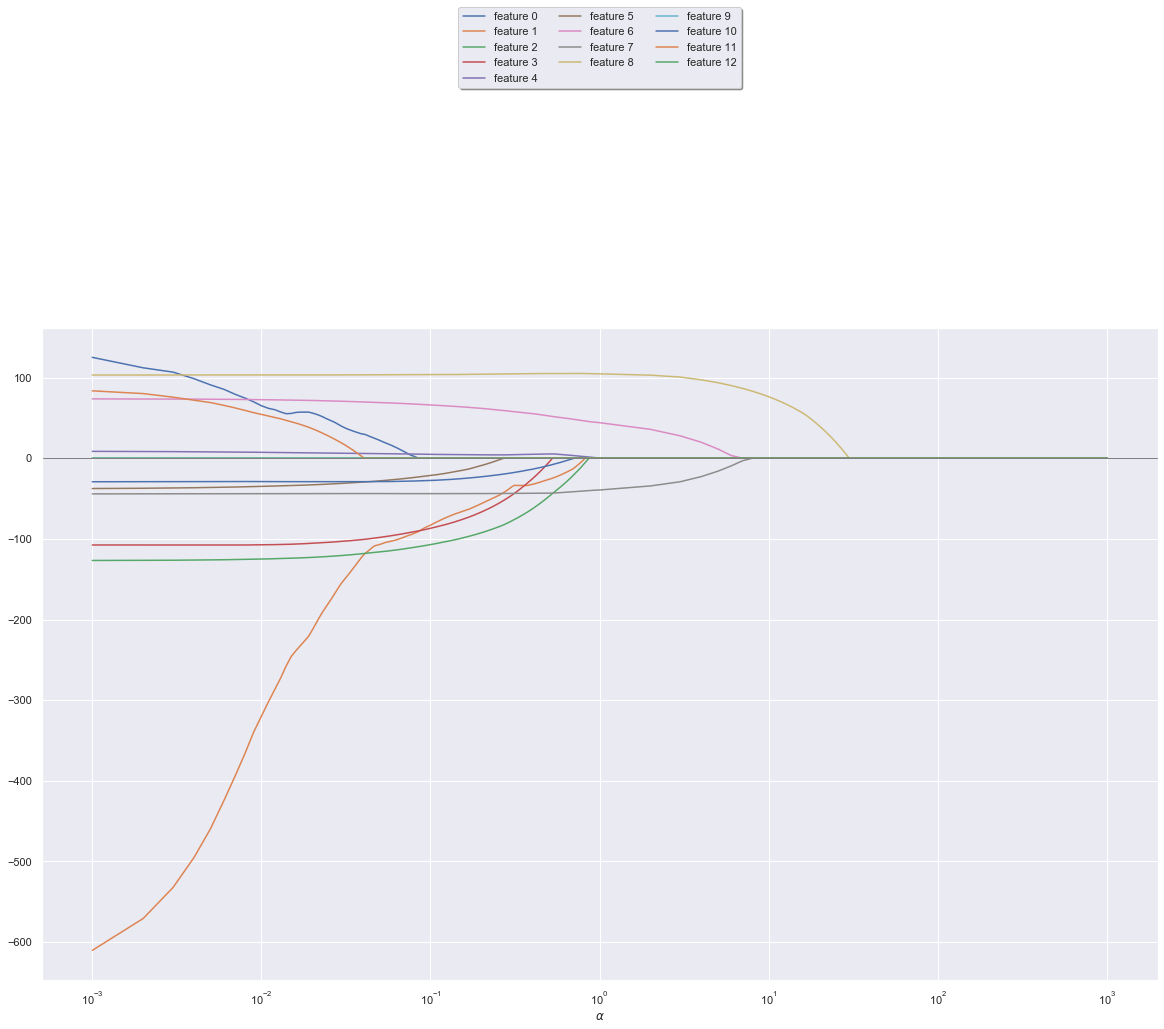

In [118]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Feature 8 is the Most Important while Feature 11 the least important

### Lasso WIth CV

In [119]:
scores_train = cross_val_score(lasso, X_train, y_train)
scores_test = cross_val_predict(lasso, X_train, y_train)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Cross-validation scores_train: [-1.35569354e-04 -1.42445634e-05 -2.80139685e-04]
Cross-validation scores_test: [150.456 150.456 150.456 ... 152.141 152.141 152.141]
Average cross-validation score_train: -0.00
Average cross-validation score_test: 151.18


### Lasso WIth CV and PCA

In [120]:
scores_train = cross_val_score(lasso, X_train_PCA, y_train)
scores_test = cross_val_predict(lasso, X_train_PCA, y_train)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Cross-validation scores_train: [-1.35569354e-04 -1.42445634e-05 -2.80139685e-04]
Cross-validation scores_test: [150.456 150.456 150.456 ... 152.141 152.141 152.141]
Average cross-validation score_train: -0.00
Average cross-validation score_test: 151.18


# 13. Decision Tree Regressor

Text(0, 0.5, 'Scores')

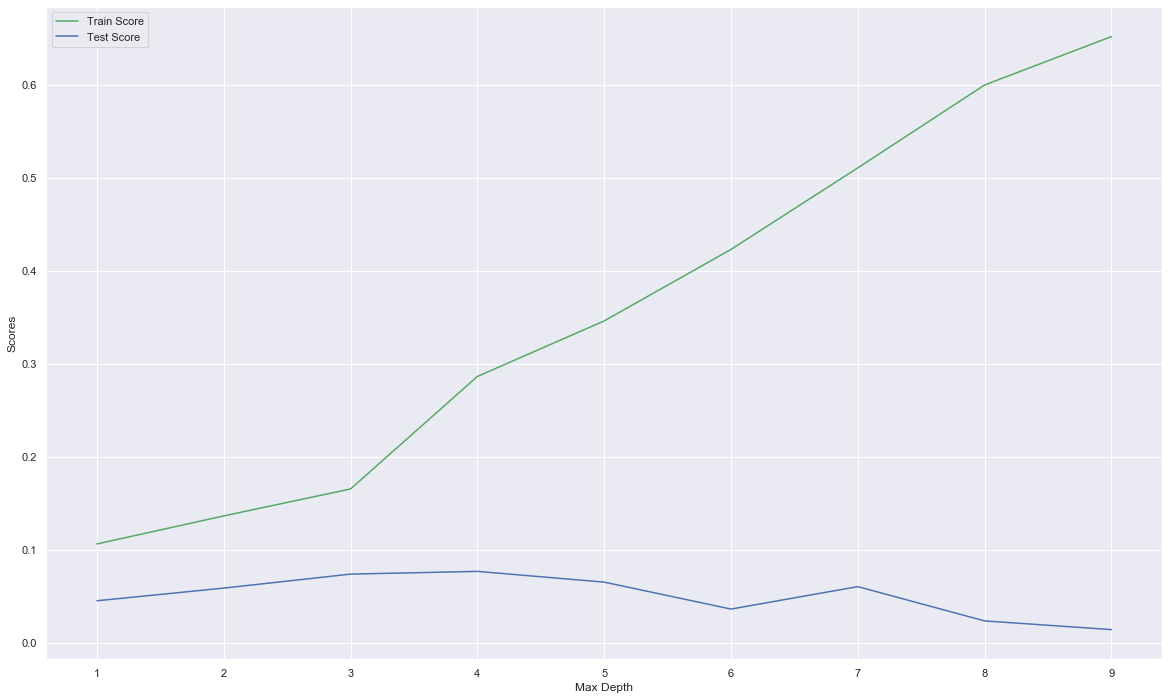

In [121]:
sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n,random_state=0)
    tree.fit(X_train, y_train)
    train_score_array.append(tree.score(X_train, y_train))
    test_score_array.append(tree.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

As you can see the max depth 6 gives the best train and test score so we fit the model using that.

### 13.1 Decision Tree Without PCA

In [122]:
tree = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

pred_tree = tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_tree))))
print('r2_score :', tree.score(X_test,y_test))

Model.append("Decision Tree without PCA")
Train_Score.append(tree.score(X_train, y_train))
Test_Score.append(tree.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_tree)))

Train score: 13.6647 %
Test score: 5.9110 %
RMSE: 306.4342
r2_score : 0.05910979981857589


Text(0, 0.5, 'Scores')

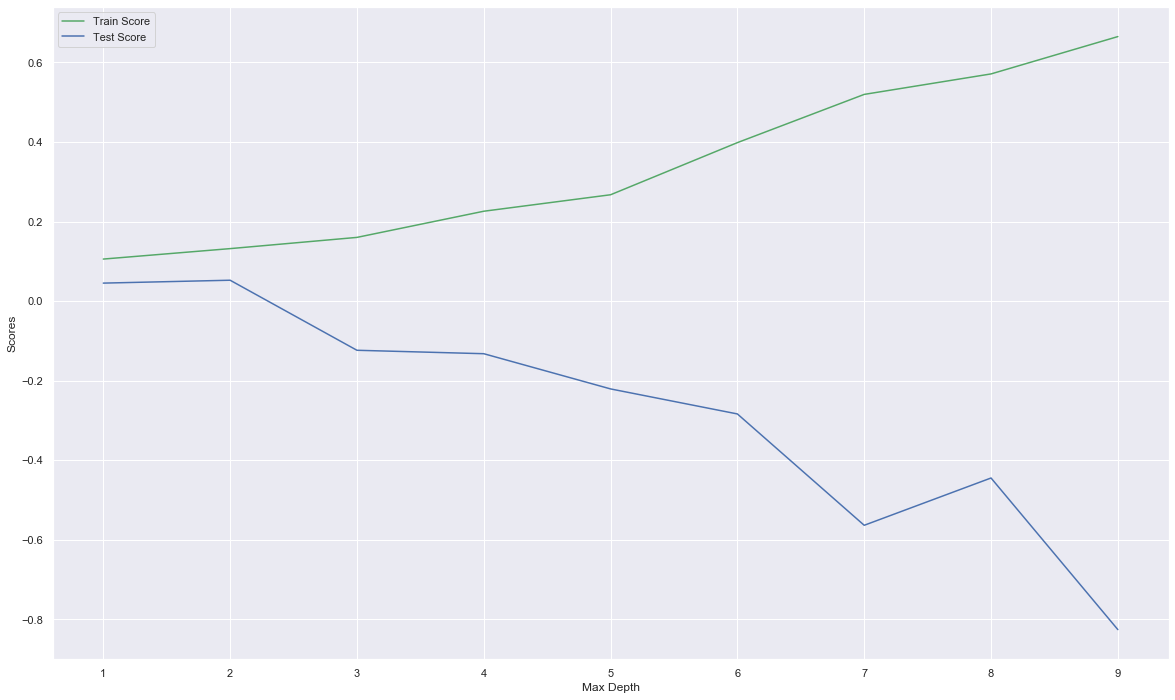

In [123]:
sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n,random_state=0)
    tree.fit(X_train_PCA, y_train)
    train_score_array.append(tree.score(X_train_PCA, y_train))
    test_score_array.append(tree.score(X_test_PCA, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

### 13.2 Decision Tree With GridSearch

In [124]:
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

CV_tree = GridSearchCV(estimator =tree, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.8s


{'max_depth': 4, 'min_samples_leaf': 3}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   19.6s finished


In [125]:
tree = CV_tree.best_estimator_
tree.fit(X_train, y_train)

y_pred_tree=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_tree))))
print('r2_score :', tree.score(X_test,y_test))

Model.append("Decision Tree with GridSearchCV")
Train_Score.append(tree.score(X_train, y_train))
Test_Score.append(tree.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_tree)))

Train score: 21.1683 %
Test score: 8.3234 %
RMSE: 302.4802
r2_score : 0.08323430094090134


### 13.3 Decision Tree With PCA

In [126]:
tree = DecisionTreeRegressor(max_depth = 2).fit(X_train_PCA, y_train)

pred_tree = tree.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(tree.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test_PCA, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_tree))))
print('r2_score :', tree.score(X_test_PCA,y_test))

Model.append("Decision Tree With PCA & Without GridSearchCV")
Train_Score.append(tree.score(X_train_PCA, y_train))
Test_Score.append(tree.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_tree)))

Train score: 13.1901 %
Test score: 5.2432 %
RMSE: 307.5197
r2_score : 0.05243242095754275


### 13.4 Decision Tree With PCA and GridSearch

In [127]:
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

CV_tree = GridSearchCV(estimator =tree, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train_PCA, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s


{'max_depth': 2, 'min_samples_leaf': 1}


[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    4.0s finished


In [128]:
tree = CV_tree.best_estimator_
tree.fit(X_train_PCA, y_train)

y_pred_tree=tree.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(tree.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_tree))))

Model.append("Decision Tree with GridSearchCV and PCA")
Train_Score.append(tree.score(X_train_PCA, y_train))
Test_Score.append(tree.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_tree)))

Train score: 13.1901 %
Test score: 5.2432 %
RMSE: 307.5197


### 13.5 Decision Tree With CV

In [129]:
tree1 = DecisionTreeRegressor(max_depth=3,min_samples_leaf=1)
scores_train = cross_val_score(tree1, X_train, y_train)
scores_test = cross_val_predict(tree1, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))

Cross-validation scores_train: [0.12418272 0.07896656 0.15040694]
Cross-validation scores_test: [ 67.95957821  67.95957821 116.74876847 ... 190.25105485  63.38135593
 190.25105485]
Average cross-validation score_test: 162.83
Average cross-validation score_train: 0.12


# 14 Linear SVM

Text(0, 0.5, 'Score')

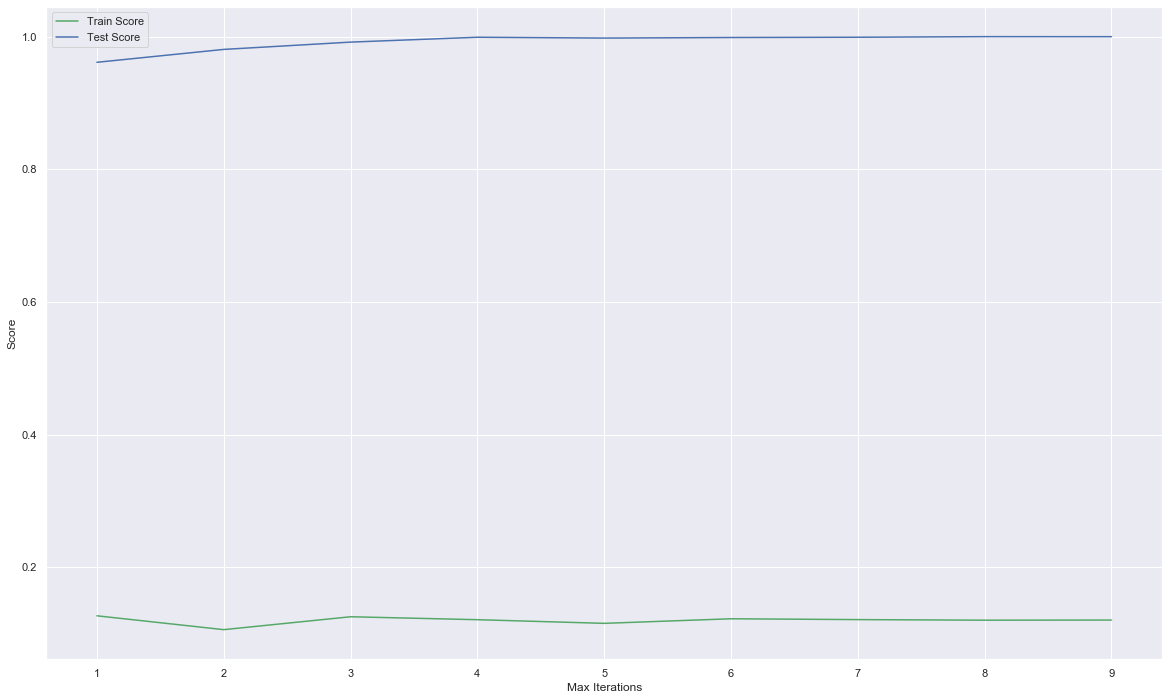

In [130]:
sns.set(rc={'figure.figsize':(20,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

train_score_array = []
test_score_array = []

for n in range(1,10):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    train_score_array.append(linear_svm.score(X_train, y_train))
    test_score_array.append(linear_svm.score(X_test, y_pred))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

### 14.1 Liner SVR Without PCA

In [131]:
linear_svm = LinearSVR(max_iter=2)
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('r2_score :', linear_svm.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("Linear SVR Without PCA")
Train_Score.append(linear_svm.score(X_train, y_train))
Test_Score.append(linear_svm.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 11.9564 %
Test score: 4.2587 %
r2_score : 0.04258681800355957
RMSE: 309.1132


### 14.2 Linear SVR With GridSearchCV

In [132]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =linear_svm, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'C': 10, 'max_iter': 10}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.9s finished


In [133]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('r2_score :', linear_svm.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("Linear SVR With GridSearch and Without PCA")
Train_Score.append(linear_svm.score(X_train, y_train))
Test_Score.append(linear_svm.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 12.5586 %
Test score: 4.7116 %
r2_score : 0.047116006110730746
RMSE: 308.3811


### 14.3 Linear SVR With PCA

In [134]:
linear_svm = LinearSVR(max_iter=2)
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("Linear SVR With PCA")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 8.6089 %
Test score: 3.0725 %
RMSE: 311.0222


### 14.4 Linear SVR WIth GridSearchCV and PCA

In [135]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =linear_svm, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train_PCA, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'C': 10, 'max_iter': 10}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.4s finished


In [136]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("Linear SVR With PCA")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 8.8609 %
Test score: 3.2045 %
RMSE: 310.8103


# 15. SVR With Linear Kernel

In [137]:
clf2=SVR(kernel='linear')
clf2.fit(X_train,y_train)

y_pred_svm=clf2.predict(X_test)

print('Train score: {:.4f} %'.format(clf2.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf2.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Linear Kernel Without PCA")
Train_Score.append(clf2.score(X_train, y_train))
Test_Score.append(clf2.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 12.0555 %
Test score: 4.3219 %
RMSE: 309.0111


In [138]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =clf2, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.5s finished


{'C': 100, 'max_iter': 100}


In [139]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Linear Kernel Without PCA & With GridSearch")
Train_Score.append(linear_svm.score(X_train, y_train))
Test_Score.append(linear_svm.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -33.1458 %
Test score: -11.7271 %
RMSE: 333.9236


In [140]:
linear_svm = SVR(kernel='linear')
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Linear Kernel With PCA")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 8.6613 %
Test score: 3.1173 %
RMSE: 310.9502


In [141]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =linear_svm, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train_PCA, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'C': 100, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.1s finished


In [142]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Linear Kernel With PCA & WIth GridSearchCV")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -102.3273 %
Test score: -31.5170 %
RMSE: 362.2919


# 16. SVR With RBF Kernel

In [143]:
clf2=SVR(kernel='rbf')
clf2.fit(X_train,y_train)

y_pred_svm=clf2.predict(X_test)

print('Train score: {:.4f} %'.format(clf2.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf2.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With RBF Kernel Without PCA")
Train_Score.append(clf2.score(X_train, y_train))
Test_Score.append(clf2.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 0.6503 %
Test score: -0.3081 %
RMSE: 316.3995


In [144]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =clf2, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.6s finished


{'C': 100, 'max_iter': 100}


In [145]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))
 
Model.append("SVR With RBF Kernel With GridSearch and Without PCA")
Train_Score.append(linear_svm.score(X_train, y_train))
Test_Score.append(linear_svm.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -101.5352 %
Test score: -31.0981 %
RMSE: 361.7146


In [146]:
linear_svm = SVR(kernel='rbf')
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With RBF Kernel With PCA")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 8.6774 %
Test score: 2.9652 %
RMSE: 311.1942


In [147]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =linear_svm, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train_PCA, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'C': 1, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.2s finished


In [148]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With RBF Kernel With PCA & WIth GridSearchCV")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -103.0121 %
Test score: -31.5831 %
RMSE: 362.3831


# 17. SVR With Poly Kernel

In [149]:
clf2=SVR(kernel='poly')
clf2.fit(X_train,y_train)

y_pred_svm=clf2.predict(X_test)

print('Train score: {:.4f} %'.format(clf2.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf2.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Poly Kernel Without PCA")
Train_Score.append(clf2.score(X_train, y_train))
Test_Score.append(clf2.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -5.0546 %
Test score: -2.5107 %
RMSE: 319.8545


In [150]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =clf2, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.6s finished


{'C': 100, 'max_iter': 100}


In [151]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Poly Kernel Without PCA & With GrudSearchCV")
Train_Score.append(linear_svm.score(X_train, y_train))
Test_Score.append(linear_svm.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -103.0116 %
Test score: -31.5824 %
RMSE: 362.3821


In [152]:
linear_svm = SVR(kernel='poly')
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Poly Kernel WIth PCA")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: 5.2255 %
Test score: 1.5838 %
RMSE: 313.4015


In [153]:
param_grid_tree = {
            'C' : [1,10,100],
            'max_iter' :  [1,10,100]
            }

CV_tree = GridSearchCV(estimator =linear_svm, param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1,cv=5)
CV_tree.fit(X_train_PCA, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'C': 100, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.2s finished


In [154]:
linear_svm = CV_tree.best_estimator_
linear_svm.fit(X_train_PCA, y_train)

y_pred_svm=linear_svm.predict(X_test_PCA)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train_PCA, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test_PCA, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))

Model.append("SVR With Poly Kernel With PCA and With GridSearchCV")
Train_Score.append(linear_svm.score(X_train_PCA, y_train))
Test_Score.append(linear_svm.score(X_test_PCA, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Train score: -103.0947 %
Test score: -31.6016 %
RMSE: 362.4085


In [155]:
X = df.drop(['price'],axis=1)
y = df.price

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [156]:
X.shape

(10000, 237)

In [157]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model=Sequential()
model.add(Dense(12,input_dim=237,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal'))

Using TensorFlow backend.


In [158]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                2856      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 2,869
Trainable params: 2,869
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(loss='mse',optimizer='sgd',metrics=['mse','acc'])

In [160]:
model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
7500/7500 [==============================] - 6s 745us/step - loss: 36059.4737 - mean_squared_error: 36059.4737 - acc: 0.0055
Epoch 2/10
7500/7500 [==============================] - 1s 159us/step - loss: 33742.2856 - mean_squared_error: 33742.2856 - acc: 0.0059
Epoch 3/10
7500/7500 [==============================] - 1s 158us/step - loss: 33749.0827 - mean_squared_error: 33749.0827 - acc: 0.0052
Epoch 4/10
7500/7500 [==============================] - 1s 163us/step - loss: 33738.2279 - mean_squared_error: 33738.2279 - acc: 0.0060
Epoch 5/10
7500/7500 [==============================] - 1s 158us/step - loss: 33732.4408 - mean_squared_error: 33732.4408 - acc: 0.0033
Epoch 6/10
7500/7500 [==============================] - 1s 157us/step - loss: 33738.3923 - mean_squared_error: 33738.3923 - acc: 0.0051
Epoch 7/10
7500/7500 [==============================] - 1s 156us/step - loss: 33736.9012 - mean_squared_error: 33736.9012 - acc: 0.0037
Epoch 8/10
7500/7500 [==========================

In [161]:
scores=model.evaluate(X_test,y_test)

2500/2500 [==============================] - 0s 31us/step


In [162]:
pd.DataFrame({'Measure':model.metrics_names,'Values':scores})

,Measure,Values
0,loss,100068.346658
1,mean_squared_error,100068.346658
2,acc,0.000800


In [163]:
print('Train score For Neural Network: {:.4f} %'.format(0.0047))
print('Test score For Neural Network: {:.4f} %'.format(scores[2]))
print('RMSE For Neural Network: {:.4f}'.format(np.sqrt(scores[1])))

Model.append("Neural Network")
Train_Score.append(0.0047)
Test_Score.append(scores[2])
RMSE.append(np.sqrt(scores[1]))

Train score For Neural Network: 0.0047 %
Test score For Neural Network: 0.0008 %
RMSE For Neural Network: 316.3358


## Grid SearchCV

In [164]:
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=237,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mse',optimizer='sgd',metrics=['mse'])
    return model

In [165]:
from keras.wrappers.scikit_learn import KerasRegressor

model=KerasRegressor(build_fn=create_model, verbose=0)
param_grid={'batch_size':[10,40],'epochs':[10]}
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)


In [166]:
grid_search_result=grid_search.fit(X,y)

In [170]:
grid_search_result.best_params_

{'batch_size': 10, 'epochs': 10}

In [168]:
Model_Scoring['Model']=Model

Model_Scoring['Train Score']=pd.Series(Train_Score)
Model_Scoring['Test Score']=pd.Series(Test_Score)
Model_Scoring.RMSE=pd.Series(RMSE)


In [169]:
Model_Scoring

,Model,Train Score,Test Score,RMSE
0,Linear Regressor With Bagging,-2.182553e+22,-7.797790e+21,2.789675e+13
1,SGD Regression With Bagging,1.419870e-01,5.306389e-02,3.074172e+02
2,Decision Tree Regression With Pasting,1.942936e-01,7.140113e-02,3.044261e+02
3,Ridge Regression With Pasting,1.789891e-01,7.059925e-02,3.045575e+02
4,Lasso Regression With Adaboost Boosting,-2.007948e+00,-6.583765e-01,4.068266e+02
5,SVR Linear Kernel With Adaboost Boosting,1.219444e-01,4.359937e-02,3.089497e+02
6,SVR RBF Kernel With Gradient Boosting,3.052682e-01,9.478710e-02,3.005683e+02
7,KNeighborsRegressor Without PCA,2.688225e-01,5.466296e-02,3.071575e+02
8,KNN With GridSearch and Without PCA:,1.000000e+00,4.671676e-02,3.071575e+02
9,KNeighborsRegressor With PCA,3.888086e-01,6.334131e-03,3.149111e+02
